**將存有花的資料夾在google雲端內開啟,並且安裝需要的套件**




In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp "/content/drive/My Drive/app/archive.zip" /content/
! unzip /content/archive.zip > data_unzip.log

In [ ]:
! pip install split-folders

把flower資料夾設成輸入,並把輸出放到Output_Folder資料夾,並分割



In [155]:
import splitfolders

input_folder = "/content/flowers" #Enter Input Folder
output = "Output_Folder" #Enter Output Folder

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(0.7,0.2,0.1))


Copying files: 4317 files [00:01, 3633.75 files/s]


分出訓練集


In [156]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/Output_Folder/train',target_size = (64, 64),batch_size = 32,class_mode = 'categorical')

Found 3019 images belonging to 5 classes.


分出驗證集

In [157]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/Output_Folder/val',target_size = (64, 64),batch_size = 32,class_mode = 'categorical')

Found 860 images belonging to 5 classes.


分出測試集

In [158]:
fianl_datagen = ImageDataGenerator(rescale = 1./255)
final_set = test_datagen.flow_from_directory('/content/Output_Folder/test',target_size = (64, 64),batch_size = 32,class_mode = 'categorical')

Found 438 images belonging to 5 classes.


建立模型

In [159]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

In [160]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [162]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 30)

Epoch 1/30
95/95 [==============================] - 15s 144ms/step - loss: 1.4036 - accuracy: 0.3746 - val_loss: 1.1447 - val_accuracy: 0.5000
Epoch 2/30
95/95 [==============================] - 15s 158ms/step - loss: 1.1315 - accuracy: 0.5343 - val_loss: 1.0267 - val_accuracy: 0.5616
Epoch 3/30
95/95 [==============================] - 15s 156ms/step - loss: 1.0364 - accuracy: 0.5956 - val_loss: 1.1323 - val_accuracy: 0.5279
Epoch 4/30
95/95 [==============================] - 14s 151ms/step - loss: 0.9811 - accuracy: 0.6161 - val_loss: 0.9606 - val_accuracy: 0.6151
Epoch 5/30
95/95 [==============================] - 14s 149ms/step - loss: 0.9473 - accuracy: 0.6333 - val_loss: 0.9918 - val_accuracy: 0.6128
Epoch 6/30
95/95 [==============================] - 14s 145ms/step - loss: 0.8727 - accuracy: 0.6595 - val_loss: 0.9045 - val_accuracy: 0.6419
Epoch 7/30
95/95 [==============================] - 14s 146ms/step - loss: 0.8346 - accuracy: 0.6777 - val_loss: 0.8747 - val_accuracy: 0.6395

輸出準確度

In [163]:
loss, accuracy= cnn.evaluate(final_set)
print(f'Accuracy: {accuracy*100}')

14/14 [==============================] - 1s 76ms/step - loss: 1.3144 - accuracy: 0.6758
Accuracy: 67.57990717887878


抽10筆資料印出來,並顯示預測結果

In [164]:
from io import BytesIO
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array
import urllib

def loadImage(URL):
    with urllib.request.urlopen(URL) as url:
        img = load_img(BytesIO(url.read()), target_size=(64, 64))

    return img_to_array(img)

1/1 [==============================] - 0s 68ms/step


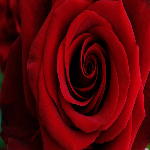

tulip鬱金香
1/1 [==============================] - 0s 18ms/step


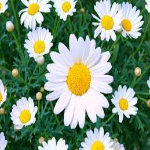

daisy雛菊
1/1 [==============================] - 0s 18ms/step


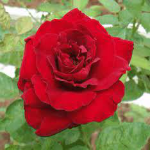

tulip鬱金香
1/1 [==============================] - 0s 22ms/step


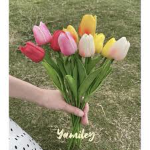

rose玫瑰
1/1 [==============================] - 0s 20ms/step


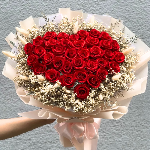

rose玫瑰
1/1 [==============================] - 0s 22ms/step


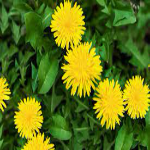

sunflower太陽花
1/1 [==============================] - 0s 19ms/step


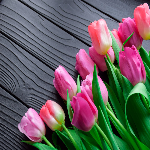

tulip鬱金香
1/1 [==============================] - 0s 18ms/step


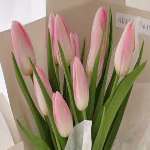

tulip鬱金香
1/1 [==============================] - 0s 22ms/step


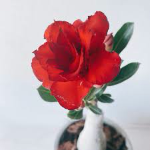

tulip鬱金香
1/1 [==============================] - 0s 20ms/step


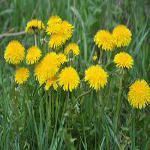

sunflower太陽花


In [165]:
import numpy as np
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as img
from skimage import io
from google.colab.patches import cv2_imshow
import random
test = ["https://shoplineimg.com/5d9d940ff12a7000017ef3dd/601e9e9e759e940c8ebd9e45/800x.webp?source_format=png%22,%22",
               "https://static.ctwant.com/images/cover/73/167673/lg-b6ea4563c1324eb94e00f65b03517f8b.jpg",
               
               
                "https://images.unsplash.com/photo-1586968295564-92fd7572718b?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8dHVsaXB8ZW58MHx8MHx8&w=1000&q=80",
                "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoGBxMUExYTFBMWFhYZGRYWGRkaFhkWFhYZFhYYGBYWFhYaHysiGhwoHxYWIzQjKCwuMTExGSE3PDcwOyswMS4BCwsLDw4PHRERHTAoIikwMDIyMjAyMTAyMDAwMDAwMDAwMDAwMDAwMDAwMDAyMDAwMDAwMDAwMjAwMDAwMDAwMP/AABEIAMkA+wMBIgACEQEDEQH/xAAcAAACAwEBAQEAAAAAAAAAAAAEBQIDBgEABwj/xAA+EAACAQIEAwYDBQcEAwADAAABAhEAAwQSITEFQVEGEyJhcYEykaEUI0JisQdSgpLB0fAVcuHxM6LSQ2PC/8QAGgEAAgMBAQAAAAAAAAAAAAAAAgMAAQQFBv/EAC8RAAICAQMDAQcDBQEAAAAAAAECABEDEiExBEFRYRMicYGR0fAyseEFFEKhwSP/2gAMAwEAAhEDEQA/APmV+810+VDLw9mMAUbYSWhdqdYfAwRFZdWniOq+Ys4dgLI/8m9L+IWlDHJ8Na3ivDUFou+hisYGzGBVoSTcpttpy2ANTvU+6ZthVmFwDM21PvseRJqPkAO0irYiG3w8j4qjcfK0DamF25oSTSi62s1EJY7yzSjaNrWPWI51Rf4kRoOdLkaTXbg1qDEoMsvYheG1MnemlsgCk1o0W17QVGEoRnYvga1Rie0LBoGwqKwEmk1/4jQoLO8jGoyxfFGcamlzvVZY7VbbQEb0wKFgliZ6wZYCtR9os2bY2JNZKYqL3C25moyapA1Rpe4kGOgqi5ipNDWVogrpVaFWTUTCSRoQda9dcswE6UuZoNMMFZnWgZdO8hbVQmjwLKqAUHxW+CsUCRcU+VU4u7JigURpoQ7BE5YWrruCgSxqrDYxLa+dC43i2aiqxB4Mse9GlVhpNDqCxokCKA7bSmNmoPevwYqzC4rIZqjFLrIrtq3m1o6FXBOwll3Flm0qeVqiEA0FXd4KWT4iC57xhwrhnhE6U5trasLndhWc4jx8AZE+dJrty5cOpJpwW+Zpuo84nxb7QSBon60twuHXPAqhFYQtM+H4fK+vSqO3EuG2r6IIjX/N6lxLEju/WgcXbPeadalxcQoFBXEKLrpDCl95aLEVVcWRTl2MEixAgattiud3VuSBTSYoCW4eKJsYZnMChcIKIw2Ma21La+0McQy/bCrBNLcamk1dj78iZqnDHMCpoVsC5G5qVBJE1E1LuGE6aVEXaZ8JU6omqnWKt76pPeBG1QEytpSjmibN3rQs1zNVkXKBqXXiCaYYM6CllhJNMrMgaClZOKkH6hC79/Ks0n74uZqeLvnY1Ph2EeQxXSooCrZhu1mpQ4bzqtZmK1lq1bZYjWkeLwkXIAoceYMaqATvJ4FwN6Mv3ARpVdjBKozOfblVGMxqN4UH9qEqSdoYahvOsgqN1wo0oUhpolcPOpO1XpA5Mqrnrd3Sar72qnuRtUe9qwkyvuYRf4UQZBqsXDbO1aC/dtxJoO/h7bCQwpa5idmEf769ot+1ktPOnmEw9yA5pMLKq41Bp6nFYUAUwkVtGJZ3MIbChvFSrj51Apkt9m9KC4jhS1AOYyIWqoXaOxGHZd1oS4BT1NwCDIK3OoXHmos1RFMA7xZMIsvFdvvNVoaP4fwm7fzd2hYKNToBtIEncmNBQMQNztLUE7CB3DpVasRtV1rDM7BFUkzB021iT0HrW9wPYbDBpLu4IXKpgQdzmZYzKdojSlZupx4B7/eGuNmO0xNh7mT4GKnTNlMTMRm230qnG4RrbZWiYB0MxImJ61r7/ChaBCKyrdnIZIyG4rDIPpvrrQvZ/hq3btguuZe6csCSIa1pr810pY6laLDj+LhnEeJkxbYgkAkDcgEgep5VbhsK7uLYBDGYBBGwJ6c4r6d2k4V91mVQgWbihQFE/C6wN5n9KwCWri53uEllSB4gWXNooaDIOux11q+n6tcylhtKbDpO8UGuKJrW9m+yZv23e6LiKAQsDWRuxB5co/tQGNQIJcTlVbajYBolm84EU0dSjMUXcjmD7I1ZgGGsxTDC3ANKAW/U3xAG1CwLGUFA3k+I2hvV+F4oyLlK6UAt5nai8QsDWqI2CtKNMbjHCXlYZp9qA4txBQ3h3oK3dIJA2rl/DzrNRMYVt5W5lb4h7hgn25UThMEQR61VashdSaKt43LqNaY5PCyafMOuWvEpA9a5xcIq6bmgm4nJHKjrXDu+E5qTuCNUoknYRDXaejs7vLVT/pA60w5ViSplOMJYgCqL6lRE1H7XqSd6Fu4gsdatEPE3uy1cIsEc96MtYgDeljDmKjcvGi03E6qj08XVVgb1ceKKbYYHxVmSa6rVXshK9pGWN4yX5UsuXCa4Wr1NVQILOTI1NRV2B4fdvFhaRnyjMwUSQJjbnUVLI20Mp2I2I6g/oahI4HMlHmOey/C0e6vfI5tlWZd1Visfi5jfatt2W7Ptbu3LQINpxntt+JXUgZH/AISfXU9aP7KdorGMw/dMFS6qwyaAGN2t+XptNOMJg+7Mgzl+o/6ivM9b12XUyMNPaufgRN+HGumxF3+k2bYc3FylyDmiCr7E5uhgH1B60RYsq1l20kJBjabYP6gmudqyLqhEPJrjxy7tVIHv3iVaLZRHAGjKfYhSP7VgLMyBmO5P7TQqxbxfAB7aqNTktuv+5QDHoSCPep/YbeRGFsKRauRACgklZJA5zl+tXYCbrFFPhtyS2nQKF8/F3h9FHWrcTc+9ASNGVYJiVtg3LhYnlma2P4aZrYe5fG8sgEQrj1rPZVFIDMwQe7hSfbf2rMcM7NCyoLqA7rcd8zwJQxHlqQf4opsvEM3cEssrmiPwwQFYzudTHrTa7cBv2hG6sgJgkFiXaeU5bZGnWgTI+FdA4Nk/KCUveQw6W7eGIT4AsKJzfgDasdSZaKyv+mWtLTgvmNzNy0gKPmVfXoKccMxIFpp2Cq/lobg/RFrvDcI128zlScoBAB55dpPmxosbnEWJPz9fwwvZ7TIHsat3FEpb7uwuXMJaGaJKqTqBtPSp9vOyuHw9lLySjMVUIDK6CWYk67VreG3C5uBAGCswEMRoDJYDLrOYCeeWr+0fD7V2bl62GVYCqfwhdTBU841jfatQ6/KuZdRNDsO8Q2EFTQ5nyR4toPAQSJEgifOTvQ+Hwz3DoCTX0nH4C0MMjXFVixATQaTp4Ig5Rp0rO4aw1olhadUDFczfi6ECAQPPbzrrYerGS9q3qZnxaZmXwjg6iKsS0AJNOOIYlWBMQYpFiMRPhrTuTUVYAlF3xGBTTCcFJWajwvDhjrvTu3bcDTagy5SNhElrmXxHDyj67U8wV1VAg17iGHkEtS3h5l4J0qtRdd+0tT2mgxF4hc1CLjlo66ym3lmkzYUfvVQIGxhjaZ1QzbCoMpG9aPH91YXKILVnbt0kk1sxsW7bSMKnMxrhNQr1MqDJE14VGrrdokTUO0nMrr1SinPZbC4Rrk4u6UUbKFbxerD4RQu4RSxBNeBZkAs1NZ+yp8P3dy3cdc7MpIK5SNCFC3NiTB09a0nG+x+Hu63Ezjk66XB5EjcetQ4Rf4bkNqwbQDaMnhIf/dJJPvWowdlFUKgCjkB8JHkOVeP6zqnGY5E1KT2O06OJBo0mjMHZ7DW8PcS/Zvk5T8LoG3BBGZYg+e9afBYskNGoVsupkzAJ1gaeKjsVg9SUYBuakgg/550pwrm1cuKywCwYr0DKBI91NKfqG6lbc2RHY0VeJThSc7rMybqmf3Xf+yD6UZjcVlCqNSSAB10Jb6Amp/ZAM2XUHX3IkGaDRszof3UePIsyj5+Ej3NVYc34j1WU4C2bKx+Nnzc9hAYwOUDb81cxNtXu5nnIiOxA0DszE+40BjyFXYuQRlMOwIB3yIurt6yR6mOlC4OBba4xOSAQpP4E1QtO5O/yp63+vv8AeFpHElwnBA3TIPhWWHIO5blOgC+H2ptdfNeRhsouP7C2UEepcUr4aHe5cOaEaJjQnQeCdxA3PmfZi11EQk6RA6mN8o6mYgUrMSX8mq+olhNoK9oLhrhGkAoQRqI5Hpo1H273d4e44+Jwqr5s4gAfSl3EMR93JU5mVlZebHIWGg5jX51LhKsVtK+0hxOmiA6Ef+38R6VRT3dTeb/PpKK2alvZvBZHZCdQAI2kkt/8H5Vb2kxWq2hy8TDqTpbQ+rfQUKMSxxIC8sub1Fu6SfYOP5qO4ZYRmN1zMt3knbKqwn9TQuKye0bwD84BXaBcR4aF7pLjd5ddcqD8NsKVBI89d+tIe3mJa1Fm3oXADR0kkg/JfnWk4JYa599c3yys/gTXIB7Fj7ikXGcEHOfI7O1xm0GaAQIU6TOg+taulYe2AY3X0v8AiZsgOk1MFi1ePEKGwWEJMmt6Oy73lV4VEPMkktryWuv2etojklhlUnMYVQRrrPX1511/79B7oO8wvgY8TLthyIy0xs4wBIbQ0FbxyEiKjxBxcIC6daZvwZk4gvEcS1yQNhQeCtMW02oy7ay+EGr7QCrApurStCWCV3M8zZRE1R3lSuSaqgUIHmASSYju3SxljNVxXq9XRAjpyu16u1JJwCneGwPgmkwo6xxIgRyoHBI2hoR3jnst2TOLuOMxVEjUAGSfwySAPrWrX9llqPju/wAyR8slAdhOE48+NbxsWWObKQHz+YtnQeu9fQHs21Aa7dgzAYkAH+EiPlXnev67Njy6cbivA3+s1YsakWRMNf8A2XINe/YD8wQ/1FavgVruLS2lJuIojOWLieesnLryGgpgeFpvktP5xlJ9xvU1trbBi0UneNQfaa5mfrsmZdLm/oP5mhEVTYESYyxLZ41JkdQd/eo3rzNbuOfitq0TofDMe0/rRWMK8m9RGU/KqLFnPbeIh1JA0JGZY9jzolbYE+k0AeIRgrxQlToY2P6jqKhh18TkcmPyPj/VjRN7EfdoCILG2sxMFiAfQxNce3GYKI0PsY0pV8+sakVMTcFwjQH7sHqBAdp9Z+VDXWLWUSSTcZJ65S2aP5QBRr2gqd0N8mUfISfrNQaxs37uij0GUfrWpWA+u3/IWmM1wLW7QCAZtySeZ1P1NLmGd/E8InxEfEzkahB6HLPKTGux2D4nnssZg6qvWJIz/qflQbYIW7BuOCJUkfkLR3aqP16n0pWOwTq5uvrFkmvSKcXca5eCoTBgbnQaRI5GZPtT3D6pJOgJK+SppPvB+dAYS13aO0RcMAc9SAq6+9GYxYt92uhaLa+QOjH2WTTchBpR8PvDQEWTALbuV7waM+cL1+9ZAhPWFBPoKb3f/G1tN4FvyVSo+sGqb1vxW7aAZgDkG4EKFzHyUN+lRwd8KuknMzlSdfCDBuMehifVgB5A51gEfn5Uor2ltw5QoWWYwiiYzE7D00knkBReIw7qotIQHcxIiQI8b+wGnnFBW7pVxdYGXOS2p3VN3c9CQJPQACulnc96PgE5J0Nw7Zj+QSfWfSllSK/N/wA/7FNCsTjrdpigUlbaAZV1ljsvsoB3/EKwvao43GTFq4LKnREBK6bFo+I1vcNaKoFVQW3Z8oLMx1Jk7enIUHxXFrYUveuqg/3Sx8lUbmmdLmGPJaLbdr/O8zZE1L7xoT5lwrs/dLEFHECTKsI9ZFV8XsNaJC8t6e47t47SqplTb4jmPrGntWZxuNZyWPPWvRYjlc3kWvnOY5RT7puD270ak1euJmgCa6rVpKAxLe9GYuzXKCt3DV2egKVBieK9FbC5we2eVB3+CJypg6pe4h+0EzkV6mt/hRG2tCNh43FMGRW4hBwYNNStxInaRPPTnpV62hVqqgqywhAgzX3v2jBQFs2ToIzOwH/qAaDwuPx/EGYIV8EEjMqxmmIztr8J2pKjWulaDs9w99Lqt3CHZzIL+SKNX/TzrnPhw4VLKoDeTv8AnymlGLHcyp8DxWyfCMTHLKGdZ8gsr8q0nAeNcUCEXLF9mg5WyBZPIkOV+lF2eMXFXKrsfzOFn2AED3mpLx69yh/MqAPoNfpXMzZmyCmxqfX8+80qgHBMqTFcSug96FtjNl8YUE9SMgNXYW3iEAhUcgnYkaEyCCY01O4rtzi14jVU/liqrXFb4/dPqo/7rOdRGyqPQRybdzGzNca2M6ZHzo0ZgfhYEkEeU1Y10nedf+qhgDduJ3jG0p5BZkx1kkCrlWZzCP0+lYnNGtvlNKN5gPxXbjR8CLbHmzDO/wD/AAKpxj/ckrqSIHqTH60Vj/DauFQAzGAY1zMQg+U/SqsJYGZ0UyqC2qzyMFpJPPxL8qeCK1eK/wBV94d1tI4OwEQDko09AKHxVu5egEnIsADqxOreyyB6mm1yzAgjyP8AWq7jKiljoACT7CgXKbscwioIlNu2DqeTFvloKmLgLqOYBb0Gg+pP0NDYUHKXeQD4o/cXkD1Y7+8VdhsMxDMRld49UUfCPUST6k0RAF2ZdyFh5767rr91bjos5yvqxj1WjeFYEqpBAnw5uYGUeFB+UD6yedds2woAUQqjKo9POoYzGsALSQXb5Ac2by/WlszP7q/gEAit4O+IRrr3HPhAyIPyz4jA1liNuYUVLCYrvnZ8rBQCqeZ9NYUeVdsYC2AS7TE5m8uYHSeZ/wCI7mLj7lMlodNGcDzPwJ586MlTsPhfYfyYltpfjMcWGVTkXUSIG24kzrWU432WW7LJeIubxduCGGugMT08q0mDw73NVJATRQnhQT0Ma6Rr56VSMJZF0JcuW851Ie74j10JpmDIcLe4dx43+szZVVhRnyrH4S7aYrcQqRpqND5g7EeYoU3Ca/QzYK0VgarGxhhHuKzvGuxmEuAsLQR9SGtjL81Ghrfh/rmNjTqR8JifpO6mfHDhWiYq2xhetHcSxCjwDkY+VQw4JArr62K3MwTeSXAJHSu/6YP3hV91dga53Jpeo+Y04Vi7/V7o3qS8b6ilLOarmtXsUPIiWxqZoLfE1aiPARJrNq1EJijEUtsAH6ZS4lh2L7rlvSm+2ulXYa3LVdxDDcxTVpTVxi49rkuAd33ma4ucKJCcmPKfKt1geG374N5yEWPic5VA5BRyFZPsQ1lL4e8JUKSs6JnkRn8q+p4nhDXNbj+gGy/7QdB6mT+lcn+pZ/Z5AONuftNXTpYibDW7Kf8A7m6mVtj0HxN7xTKzczEF5CSB4REA9NIFFWeDWrfiJ/ibX5Tp8hVGOx1kFQB3iHXyOU7Zj+Geg5RXHOQZD7tn1moe7D0wNhxozAeR19zyqP8Ao9ldVGc8szyB5kCPrQePxl5gBcOUESEGkDkSu/zqrC2EZgHaBrroP1pIVwP1H940S/vrYMSJ8v8AipBmbXLA6k6/IUww2Hwyc0Hm2p9gf6UJxPiSA/d6kbGIA9B18+VCDqNAH5xivKcSMoGYjcETyOpGlUWrhUXGHiJIMAdAq/oBQbYUu4uXSSRqoPXqa8t5kuqqalz4p2AjxH5foK0jHtQN/tD1dzHrToDvEyNhVV3DByoYyAfRSRtPvQWOxiKUMEuxyyBqFGpnXXf61yzedAwH3jsZHJY/eP7o8t6UMTAWJYbaOQoJg8tfU8q4iSTyP9KBs22KT3gZpnNsJGhWOUf2qxcW+zEZthEmfUcqScZ7GFZqEY26tpPEY5DQmT0AGpPkKDe+mxWHYSZ+KY6jkK99gdmzqc1zaToig8gOQ9NTUreFe14ipdm+JguefkJVR0imKEA5sxZJgd/DPlAzjqS6yun5QRp5zUL2OTNDhxaicygspy/iNtjmZdDoN9N+Zt3CvdMwRGwgR/Kdz9aHv8KJ/EJ9x9DTVdf8ot7MYWMTdKi5aNvEW+qGD5gruD5UpxuOwUk3cCM3OEtsfM+IAmhbNm5ZuF7TFG/EV1V4/fTZvXfzFN7HHrV77vFW0B2D7of4t0Pr8zRBNB1ILHoaP0HMzNfeLbvaTC20m1bdQPwgLb9tNqx3EO0eMggYi6ASYHeEkCdBO9fQOIdirFwSjsAdRqCPYx+tfOu1PC7mGuhHgg6q3UeY5Guh/T26d2pdz67/ALzO+oc8QAWQ+51O586g1t1aFNEpAANRx86Mtde+0WR3hAJKw29Dd6wqqzxDrVjXRQFTe4lHfiLrOFZjEVevByNTTK2Mk5qsZsy6GK1Bch3EqlinFYIASKBcVorFnk1KcdhlR99KqyDRlEd5Zw5ZFGrbSDmNLreJ5KKlcsEjMTSmWzvDDbbSvEXpJVB71psH2xxyIFN8AAQIt2xAA0Hw1l1xIUba1zD4h84YDNBBgiVMGYI6VeTCuQUyg153ghqPM+mcC4fdvAX8U73JEqjEhY5NcUaa8lj16Uy4rj7Ft1bLmuqAFGyr0JUbDoN9qUXu2lnuMwOW8QJTIxCk7+IiCff3NLnR1P3ikXDqQTJ8QnXzg1wPYuzlsgobgDj6ek1hgBtG32wsSxJZyZJO1dOurHSreFcHYr3t091bAk5tCQPXYeZ09aDuX0e4TbP3c+Hz8xO48z/2NAk6e35UaG8wy35CKb8P4Y2UORLOYQe0lj7f3qvs7gBcbMfgXf8AMeS+nX/mtRftqBnZssKwnaAwGo89K5/UdRpbQIwGpnMXhu7Qu/xbZdIWdh5tGvkPMilGAXxM53iPn/1Wj4lYVrDXGEDQWweQJ1dupOpPoKS8BCO7K2iwNfMGY9Y/WmYn/wDMnxzC1yXF7KqiyfGUZh+UPoPfwmo9mkuOj5jOUzPlA009/rU+O2GF9wdgq5fTLED60d2SIBuL6H9Zq3esFjfgwtR5g+GAtXrlu54UfLcQ8lbLDA+Rj6Cj8VhLYQyddwwP+aVT2qtAojfiVivtH/A+dX8BxKvaAYjwyuuxHQn/ADSkOxKDIPgZWowGwxU5GJBBgODETtP5T9PejsZcu5SojPyzAwfdYoPEWBtObL4fVfwyeZggGiMPxJABbumI+FzzH5m5EdTp71bC6YC5GO1xPduFnJBNu4sZk2I5g/mU9edGYfi1uIvkodPH/wDjPmRsnrt6UfjcGrAN4bmWcpHxgc4I5eWx86RYpVbMFIbLGcc0zCRI949dKchXIKr+Pz1ipp7dn8SFbgI6DxD150Be4fhrjEMjWmPQwJ9D/asPfe/hmFyw7KoMlQTl912IrRYDtnYvgC8ptXB+MAuny+IemvrVv0eRBrxkkemxHxHeK9st6X2MZ3+zbW1H2e9ctsOc5kb/AHJt7isD2tW+12MSBnCwGAADKCYII0Nafj3bMYfILTpeJ1PNQNoJ3Df86bVl+0vaT7UyNlyBV+HQ+InxEGNtvlW7oMfUBgzgEHv3+8zZ3SqB3/1EjOAsGiMO4KaiqLiq+9TdwBArsE7esznLQguJsLPSh5q29coSacoJG8SWJMfYmyTrQyqRQiYojnRxxqkCRrXTx5EPpNViWo2lLbmCLMSTpRT3hyobEC4TCg0vqEBFrzJYnVVV0G9eS0X3NTw3DTu59qLEL8IrOOnarJkuKcTZC8qjZxRXYU1+y96DO9JcTbysRVFK2MGzCn4gSysNGBBGgOoMjQ6Gt5b/AGh4dLa3PsxfEFRnY5VXMNJz6tGk6CvmU61Y1w1nzdHjy0GHHy+UJcjLxNZiuPYjHMWutFlCPAsqhYyVXeWOhMkmI0iaa8IRrri2nueSgbk9AKzWHujJatJrpmaObvBPyGVfanuO4qMHY7pCDeuCXP7o/t+p8qxZ8XCYxXgf9jkb/IzY4btfhMO32Zc7uNsqyGaOZ/CdOewimGDxjYt9RltKQSJnMeQJ+tfLezVqW7yJdzlXrqdT7n9K+p4C4mGsZmYAKCSTpJiWJ/zlXF67pceE0llz3PnvU0I5YWZT+0LiYS1btA+J20HkoMn0Ej6DnSrslhc15J2SbjevL6kVmbvEmxV98Q05ZyWx0VfEfcyD71vOytgW7BuNoXJYnoi9fLc1MuL+16cJ/kefiftIjajchxayzOzAFoAJIHwqZyg/JtfOgOHYgpcldND/AEpvh8WGsXrm2ZLbAHcC4kgf+xrLfb1t3ELmFLqjHoHMT7TS8KMwKVxt/qN1gDePOMXCxbMehGkbwa92OxkO9o6yQw+Rn9KO7R92iEwpLKqr105j2G9Iezjxi7f5sw98pIn5fWgVdeBhXb9pRaaXjNoQLg1iAfNSdPr+ppN2hwkCOozIeoPL/PKiOKtcs3MjQ1pmzRG4nxIJ2j+1NeKYMXrIyRIAKRoCI28pFJRvZaDex7y72qYrsxxbOLtm6fEhkBQAY/fXqY3FOeJ8Ilhi8IVa5lh1PhS8sQVb91v7Dbesb2iw93C4mziApXPPuVjMGHKQR8vKn+E4myMj22+7uQY3AnQj1H6V1c2IgjLiOxHHY+RM6tyrdoP9rTNmCkAHx220e2fxIw/rsRSrtJwU2CL1rWy8EflzagHy/wCqX9ouN3ftbm4qo6eAhRClRtP70gzPSKNftXbfBtZOjZhAOoKkycp8iPrWxcGXGVZBYNWOdj9pnyZFZSDyOJn76kmaoa0aJ71Tzqu69b1JG0wazBHuEaTVq3dKGuNJqVo04rtIdxO32qiKtvHWq6NeISxlheDu5HIVt+E9iMPctSz+L1rFWeJuulPeC8TusIU/XWkOXGxjhL8b2VFl4AJ6dKXY+/k0ywa1XC+Mu3guifXerL/Zm1ezEyJ2NNwar/VCnz9sWTXUvCnXFexd62SVIYfI0gu4d0MEEGt7PIbjPC3elDcfwgK5wIP61Vhr77KKG4q18/FMUDOpFSrimumvGuUuDCMDjntNmttlO0wDE8xI0PnVZvFiSxJJ1JJkk9STvVBroqqHMu59C7AvahrjOAUUaExkXUZiTprB/wANBdtO1ZxB7m0fuxudRnjYAfuj6mslaerM1Yf7NBmOU7nt6R3tCV0zbcEsTYwyLqXDfzNeuKPoFrW9v8euHwZtqYZ1FlB+WPvD/LI9WFZzsV2pwVqzaS8ji5bz5XALAh3dth0zncVnu0fHXxd83H0UaInJFn6k7k/0Armnpny9TbAhVJO/fxUZ7RVSgd59I4ziBbwgAOr93b9rYJ/4rBdpcT4F/wB4+itT3tbimZbaqCVUMzRsJIAn5GsZxrESqDzY/oB/Wp0GCqY9yYeR9o97PYolWkk7RJmBpoOg8qZpjjbi6PwMj6cwpzEe4VhWZ7MX9HHTX/PlWkwlgvhL7dASP4FYn6E0XUIq5Dfkf7kRrWbjtRD2FuqZAKkHqraf/NKezXGilw2nP3ZXOvVSDDx5app5mqew/ExisE+HJHeW1ya75T/429iI/hHWs5icb3V61m0lnttPLMp0/mCVzcPSXrwMNxf3BjC+waP/ANqNy02G0uIXV0dVDAtqcpMDlDE+1Y/spxhGBw11gsmbTkwof9xjyB6+fpSziuKm2/8ADHrmH9Aaz5au50nQhen9mT32PiZHc69Qm8/aXw0xZxWUqWAtuCI8QBIn5MPlWTu2oANdxXG8ReRLNy4zW0ACqTppME9TrE+VEFfBHlT8SNhQIxuvHjtFZGDEkQIrzmqzePWuOxUxUSAa0geYmgOZdYQsdKKbCFRJoFLbDVTRPfsU8RoWBvY7SiBW0oY61Gu1zLRQhtDyA1cw+LNsyGg0J3xBiqbwM61GGrmPabDB8eGhYa9a03Ce1KbGvnODuDLBq7D4oqdDNHjAWCRPqxxi3RWQ7V8MZPENQTXuBceGisYrW3LNvEWihOpGhpzLqG0lzAYHDd3qa9xG8MhkVd2jsPhvDcGk6HrWexnEswgVlKm5LqLX3qMVIiommQJGvVyu0UuSttFWqapiicIs60LcXLuXxFTzQJqAqOJkwBSKsyhzNZje0FtrUK4zNbQFealh4wfTX/DWTx1/M3kBArlmy0167hTvQ4sSYjtGszMITwHFBLon4W8J8p2Pz/Wt1jcZatcOYB0Ny5K5QwJGdoOg/J+tfN+6Ne1FBn6ZcrBr4IPxqWmQqKjDhnHLmGvC7bPiEjyYEQVYcx/YVZxTilzFMLlwiRtACiTEkxudBrShxJqd6/AgU84U1BgPe4v0i2c8SGLvljvULVssdKnhbOYxTXD4MIKJnCCoBNQSxhYOtFuakRVV0xSCxY7wSbWU4m2CQa9etKAIqN1Cdai9/Tzpq8VDXjeTtXOVcxVD96TXSamne5DQ2E8a9NcLV7NR1AIuduNrXlfrUUrtypHy2wJq3uIMiq8HRa0tmIO0OgROI9OeFceu2Y1laQ3aIXamoxijzHfbbjqYmygHxAg1jVpli/hpfb3pjneCZxqgancqNAJUiymuKKJPw1Qm9WDIJIiTFFoIEUNa+KjHpbyd51RUbuLCnrUl50vu70KKCd4QhIx5qTYpiKBotvh9qMqBJqMqN6uNfmqK9R6RKlwaqyZr1cFSVCsDdynWm/eAjSkZphgtqRmQcwHhJqm7qauNU3N6Sss8SxWAFCOATtV96hhTE8yrkSKhU2qJpglrvKrkVzvBXb1VUwDaNn//2Q==",
                "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMVFhUXGR4aGRcYGBkYGBsbFxgYFxgYHRgYHSggGB4lHRUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGy0lICYtLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIALcBEwMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAFAgMEBgcAAQj/xABAEAACAQIEAwYDBgQFAwUBAAABAhEAAwQSITEFQVEGEyJhcYEykaEUQrHB0fAHI1LhFTNicvGCkqIkU3ODwhb/xAAaAQACAwEBAAAAAAAAAAAAAAADBAECBQYA/8QANBEAAQMCBAQFAwMEAwEAAAAAAQACEQMhBBIxQVFhkfAFEyJxgTKhwRSx0UJS4fEjcpIz/9oADAMBAAIRAxEAPwDO7Tm8hZhqte4dVGoNGeC4QZXEc6Ccf4U9p5QHK21ItIJhKtcCcqnC+50GtGDeUD2qPwbCPbQP3bOfpTl4XC0m0B8xQH8kJxBMKDibomYNRIRjl1UnnpH1ozewQOmoPSh2J4UwE1VsqRCHXcE1okk5l6j9OVIw+OkxJmdDRLC4K/yUx1jT5nSoXEeFsTmVcp5xBB89NjRWPOjkZtQaKfi8n2fwgA5vF56b1B4bw65dbTRBux29qew+GDeEn16/KjV/FLatZV3jQULNlEKj37N1QHF4b+aba69I6b03axGuWrD2fwIAN0jxtzPIdBTuL4QrScvnI61DntBgqBVAdBQFMEmYsTEa15wHgzX8alh81oXCTJUgwAW0B3kDSrNwXs415We1Ju2mVgjgZHH9JPWRt0NaQcCuJtW2vIUuIQyE6XLTrynnr7MKzcZ4oKEsbfYndpgEGNxeU/Sph8EafvdVDgfZL7LxN7Us1m5h3KE76tbVlJ6ifkwq1YfszYtq6IsK1oWo55QXJ13JOc6+VF7gllaNVB+u/wCH0Fcr1zVfE1q3qcbwAeZGn2v8lPspBo0WO9sOHrhStiyJKqAT952ck+51AFJ4/wBj2w9jDZVe7i7zHMF1A8M5ANtD97yNapa4XaNzviitczZsx1IMBRHSAAPnUzuQGzQC8QCeQPLyG1aZ8XfTDGtn03df6jfXlJm+uiF+lAzTvpyCwDinDcTaud1eQo0AxIOh5gjQ9KQMLA1Na52g7J94lxwhv4lxAd3KInTKo2A5CD5nnWJ4u6wZlYkMpII8wYI+dbmAxf6xliARrH7i5Me6RrUyxyVdTWvRjFUamoiTvUY2yxNaraY3VGAHVXLgvagABbkleR5j9asyYuzdUgOpBG06/KsxwVkjerXwTh2HeC98A/0fD9TS1WkwGyBVptGijcdwjKRbg/FIPUEb1yulkqBJEeKec1c+I20dORI+E/lVRxwQtlI0oQfBDdkJrpCjXoS5AIZTqOdTcNibexUA+VO4fs+jpmRz0pB4A/Jx7yKk8l7zG8V1/D2yMxIP4/Km8PkkA6oSJ15V63ALnkfelW+DXFOqn2g1fzDCsK0bpWN7OZjcNkgogkk6a/0jrQD/AAlzmbIxCatpqJ6irLxKzd7tblqQUILL5DnHlXmB4lea/ckA94gDdIHP60y2pLZTAeHNzBPPwG0UX0H4UDu/yyREgVN4jcKtpNDmcvpFAL8yEX5xolfbh0FdSfsTdDXVTMFEBWrgyqVzA6GpeNuKEzMAQutC+G2shhT4WM+lSuNJmQoDpGp9KsfqQ3Xch+K7R3Sv8plA5iKGpxO+2rP9KgYDC5boaZEx89Kn8Z4LcAL2p03FFhswiiG2Svtrl11nUVZ8JeEsABIE6/Ws7stcWGYEQedWjAYq4xnLCkEHrqNPrVKjIaQoqU0UxeJLDeRQi9cExTl69EgUOeaRY3dQApOccxP0I9xXtrDAnw5j5Nv/AHFQ0YTqdqI8PxIVwYB0O/I8qMJFlUyFZuG4RVQPdMLyA+JvQch515xDHCB4ItqdVBgleYzdY50PTGFjqSTuTRHs2GbEowtPctqSHIAKqSNJnTmDG9CrPbTpl52HGPiePDmq0mF9QNHH3V34DawrL32Fyw2+UmJHJlnRh6TRE3tYOh28jXW8PbGqogPVQAfpSc88vn+ori7VHE3I569hdPTbb+EoE+409vzpLdf3+9KQziKZN+au1u6MGkp+3uPSP1NLQiaaUg7mKUWI1lQo9vrUPbrCghRuN4N79p7QuG2rCC4+ID/SQRB9T7Vhfa3g2Gw99beHxBvAD+YSVOVp2lQBty1it0xfEMOUcXLtjIB4wzLEHTWTtWM9ueH4EXwcJcUqwJdbbKbakQAFy7TqSJra8BqvbV8s5gLmA2x/7GJ00204rOxYGWRHfBVO/fHwrS8NbYCQKdbBoIINS7F1RpXVOeAIaFnzGi7D4dn8qmtatpuwJqNirhjQVAN6DQmtLlQtLiigx+X4GPpypNzEM5lt6l8J4cCuclSTsBr86RdwvjA2k1WWzZUlswFYez5K2JP3mkeg0mpl+8qgFmVfUgVF7p3AW2QqAROkx5D86T9lw9seN0LzrmOY0JxkylSMxkp6xxW3IAzP1ZQco9+ftRM2w8R86Ff4vh0HxfIGmP8A+oT7qsfkKtfgo8om8Itd4SSpGaQemkUGwbrauMjasDB9qdv9r4HgtGf9R0+lC+HB7t5r1wgs2pgQOm1WAtdHaCGmdEcvWEYyRUMWbaEmBXmJxOUnWgXEseSYFQ1uayqwFxhWP7fa8q6qmqnrXUXywieUOKs3AsSr2cz729CfTb6UC4txdrkokhPqaBjiLAECQDuKjriHY6UQUTMlGFKCjXCrgD5WO+1X3DHwgnnWaYW34wXNXjg13RQTK9apVbEIdVqY4zaVr9tCPD8Xvymux75YCgCk8cxa2zn3cnwjyqv3+IPeYCYrzDAVqcRdELt7WkFTXmHsEn0onYw21JGBYIbiAhNxDG0Uixfy+2tEcUqxHOhGJSNd+g2orIcpF0OxnErzEgZkXoJBPqfyoz2A4s1rEqj4u5h7DyXIYAEgaTnkCYAnehIt3WEFj6SajJaMwdx1pqrTZVpOpGII9/m42TVNwYZC+gLHa3Bs2Sy74hhytq9z5v8ACPc0Ys4xWWYKsfutoR7iR8qy/sV2ww+Gwossrte7xstu1bLPckyuu06xuT4dq0fB2yyJdu2jbcj/ACcwaD5kDU7eQ9a4jF4X9O8tLSBMAk/VHK1vggcVqUageASVMYRpuTv5U09gch+xTgZoO2nxHziSPl+NKQhhmAImBroYMH86Uki/ffBNB0JCMNNwfnNLQyxGUR6U1366L/VmA6Zk5e+9S0cfeEflVHmNvv3zCq53BQ+Ipcy/y0tP/pc5Z9wCPpWXdvjacBDghYvgyWEQV1/o0aTzPSrv24xV2xZ7+1dIhlEiCCGMQynQjXRgJB051m7465iLrPdYEtoNI0G2lbng+GdaraBOhIM8CNCLrKxlbL6Rr8RCAXOHEWvQ0Hs/GBJ33q3cVfKuUjeomE4UFR3O5GnkDXTMrZWku3STanpkqI18pAeCDs3I0zfKnan3AKlNxETUjhfAXILAMwHltUBwAuozDdRcMGX4WIPlUp2uXDlbWB0qQLXhOXTL+zSQ0GZ1NUDpKjNJlQbdoqxUTpXOjnai9/CZFzHc6+tIsPGoqc95U5kJOFYjWpmEwmVakXrx3inOHtmnSrGo4i6s5xIUTuSak28SbY0pN68FaDUDG38xgVF1UtlP3rpfnUa4o509YcAGaAcQxZLGNqJRaXFEptvyRDMetdQj7Sete0zkTFkcbheaKRxHCiyoZaMYf4ia9xOF70ERpS2aCJ0SQeZuqvhldxmGvlVh4JxHutLu0SP0pWDwOQBRUvEYRCsvG3pVXVgSbWVnOBVe4lxAO5ZjvsOg6Uxgr/8AMVvuzr6V1zhsuSuqimhczNlQbUYNbEK4aIRn/HiNAihZ13LEeu1We3eUqrCCrbEdKpAwrAZip9K7BY+5aJEMyHdenmOh/Gg1KIcPR/tCfRB0VixLSxI9vaol9S3KvbOMVWctqCVjyDAf813aM5AizDfECOev1oDaZzBqhovCiXJB0PzqPcYtvE9akWrneKGjXY+tNmyzTA8hyojbaq88UQ7J8cXB4pLrHwnwuQoYhT0JErrEkaxNa4vae19jbG6lTIRfvN4iiADq5A+dYanCv6iB1pZuspVUdsqsHUE+EMNmC7TSWO8MpYp4fN9DzGscjtP2TFLEmmCBdfRGHs5LKI2rEePzZtbntJPtQbi3HO7wV3GW4fw5rY+6ZbLbOnKCDWUcR7fYt7Ny0xAZwF7wGCLYBzKF5MxIlp2EAc6tPC2uY/hC4SwQl62LYdbkrmtqQVuJp4lbL6aETtWM7wp9DLUxEQXieAbqfjQcovqE82sCCG8Ecu8WUYaxjyG7uF79QDKq8AuB/UjhT6ZutW3F41FthyyiR4SdiTEfMkaedVjgPDL6I+BxeW9Ye2VW4CQYIg2zz2JgzIiOlWHF4G26ojiVBWJ3DWyGUz1lfpSGI8vOGkzBJBF5adOci/BGaHG/cqlcb7O3cbbLKbtktdJNktmtqbauHaIE5nXSNNQ3OoPBuxbtZw7MzB7rS0xCWspaSInNoojq4rTA/iA6ilowHKiN8UrtblaLajpETqdtbmLm6G/Csd9V7fnvTiqTd7GBsTlk9wqhi7QTrPhBiJ036VU8bcQByBmUTlB56+GfpWkcexLu64W1o1xSzt/Skx9dR/zQ7inZXCWrDPdzFohTmI8UaQo036zWhhMa4BprkkujKBrH9x5k/YGFn4jCtLjksBMn8DkOl+SyXCqRJaBrvUnhHE7rl+7JULM6aUYxdpVUBVmTtvNSMEunw5R0gAfSt1x1tdZz6gLc0d+2qC2GzTO4HLnNDsVfX4FUmd25D9aKpbKXiOXL9aDXhAqWESis1Ql7z54zH0ozg2bzigfeMrl9z50U4bxAsYYa03VaYsEeo0xZGbNjOYFE7WHCCAKgow3Bg1Mw2LH3jp1pV0pVziQouPwGdgdqHNgYJq1MvMajrQ7iNgkeEa868H7FWZV/pKCtYEa0Kv8ACy0lamYq82bL50asrCbUYVDTTGfKFS/8MfpXVZWujpXlF/UclHmngitjDBRL6DevBi5YCAqfjFR+CY5sRabNpJj5VM4jgkGVQYhdfU7UrYOIchBoB9SG47jS2wcq+LlNVjE4t7pLMWMb9BO1TcbetISFHeNzZj4fYVJ7N4dLiXw0DNA9NyI96apgMbmhXkMbmKk8Eju68s8ICv3g515wiyUYo+y7+fpRV8aPEYgfdHlQXkycu6rebJJdbSZ3MAbf2qt8Q4+WJFtcvmd67jOKuXSWA8C/9o/U1GxvDGW3buiWR1BJ6EjUH3olKk0XdqrtDdXKdwZC9tmOpzbn0FFTb71VtsJybN0B5UJ4DigLTJzBn5j+xq78NwKqiyPEwDHqDG3tQcQ7K8oNQkPKHcMwCoJOvTy5T9aD3jByg/CT/arNfEDagd/Cy0jWaXa+5JVGuvdDrqM2pOlRrl1VJUavyAo/cw4UUL4vjO6ChVAdp8UDQaUxSdnMIzXAmAvezHBbeJvjD37rW3cHKygMA+4DgnYiducVsvZTs7cwq27d24l8WgRZu5SlxVbe2dTKdNeQ00EY9wPgd68e8tFGbUlQ4FwECQcpg6xoROvStC7Hce4gJS9h2uW1IGYg27oDTqAwi7HPY686x/GW1aoPl1BA1aSAZgj06aixE3vxhaWGIBEjXfZX+8mbSYjYiknYhh78j51yyRuwPUik67fWuWa3bgtQBKA0B/fSuGv/AH/nSR+cV6oiiZVKRYsAXGuR4iAJ8hsJpvHNec5bSJ/8lzUDrlUb+8VKuA5dDr1puxdGqgk9TVJk5wAY0nh1+2iE5uYWt7KocW7HIlovcxIQqJDZYE8hEyZqsYXiaunRuY6GtS4x3Ys3DeE2wssCJkDWB56VhfFL6B3eyCqliUB3C8gdTXTeEYmriGu8wknjAA9rDX8LDxuEptyhkDrP5sizj+YD5a+39qr3FjFvNS8FxwMjq4ljorA6b6yPSa7iS5rOmtbLKbmOGbihtplsSq0mJ6ivbx+8pj0p23giInnUm/w7wyKeLmg2Ry4IdaxTDTMY9aKWeNQAIJoUluDqKnYC7bt+J0mdj09qmoARpKq4Dgrb2e4g4EnboatFlVuLKn1FVHh2JRxKMPSp+GulTIMGsx+pkJB59V0/c4MufMaXcsZaIYfFBxB0amb65d6rJKmSqvewLZjArqs64K4dQh18q6p89o3HUfyjAu4fZV7skw/mAiFzSOW+ppHHuJaHLqx50WHCH7kXgpQMYBIIkxO3QzoaBYrCnRWUqykyCCJjfeihzHvLpGu3JELTqULwfCy5GbQGi+Dwi2ywDZVGrUyl0l8oqZirShSW1AGtWdUcTdDc6dUvh/FLd9ntqIgaHn61O4hhLYVARPhM1UcDj1GIQ27eVZyk9QTVl7U4vIuUCZXfl516owtcALSrFsWCqHE8YXYxoo0VRsB+tWfgEthEnUeIa66ZjpVJfMeVXTglzLhEXmCwP/dP5imaoAZCjEiKduKjcO4KFvrB8JMx5DWPpVzD79RQvhyhFzndzA/2jVj84HzqRbxH1/Ws7EElwnggZi65SMUxGhp/B4OBmPPan8Pg+8csxEKsf9R2HyFP3FP/AB+9aBEhUcYQm/Z112qq8at5rg00UR66yf09qtXE8UFUseX18qpuNxmpdtz+4p3DgzKLQBJlaT2N49gpMYFLVxRuroSf9pukH2BrQMFjFurIS6ByzLHygkVmv8OuxQvIuLxSyja27RGhHJ2HMHkNo11mtAu8USclkG4QYOSMi9QW2n/SNfSuQ8SFA1y2jJI1MkgfJJ39gNLreoF2X12U4CDoT7z+NeMzU20gZnyr6t+e1PWcQrDQz50idMwEp6d14j6x50m4YGu3pXtwhRPSDTjXAdCJBEipcSDa68mHgjeV6A/lT1t1UAACKgYrEZYKsImDPI+dc/FEtlRdYLm0Vj8JPSdprz2Fw4qHkRBRMlDWS/xZs2w9s2+5GYNJQjMSI+MDT0PmelaFxK5dC5kW245qSVPsRINYnxnCzfdggQEyVXYeVa3gWGmt5ubTu+46Qs3GVAG5T3H2QzhvA7hbcRRzGEWO6XUs0xpppE0W4c1tbMgPA0LZGgE7DNEA01dwxdMz/dkqefSa6Z9QuPq+3f2WOajnGXWHSUG44q3GmAv+361DH8sHxggcjvRXC8Oa4WZjABGXz61C47hdRbQa7t1J5VLDcMJRGG+WUPNxLnKKj4kr8NTG4abYzMYEUxi7akK6+9HaWzbRGB4LzD2AvMg0e4U8GSxPkaip2ev3MKcZbhkVwmRZL6kCYA2llHXWrbd7AXbFq7cNzPlto6hVjMWJDrBOhAA9ZpTEY6g0ZXPEkkfIIBH3HYKsab3t0QU8SUZo5UzgOMvcJB3G35V3FuCXsHiO5cB2dM4yS0gyCIiZGU0N4WxDlo0NTSNN7MzDIIsUPyQ2ZCM3u0uNzGLzD0Cj/wDNdTWTyrqplpf2N6D+ETzSttxeGViCdBb1BAkgx90dY5gTrpWe9reFXsUn2izZKW7Qi2p0ZlJLs8MdN55kk+RrR8SWVTkKKx2LyRPmAQT86qPaPhFy+qLc4gqDNLmCobllVAwAG/xFjPyrlfD6vlvzAj3MkAXmzRvpruYvcaWIZm7F/krLsHdFvM9zQ7CoOPxrXyAoIQcutSu1+FNu+9kMjKplSrZtPM9dDI609gsH3dtXYegrsmluUVBvp7LHc3Keab4dcWypW5GVjseR6jpSuP8AEnVBk56TAMD3odxMd40toOUVKweC8EZ83kanK0EPPRWDbSUNwFklZ96sPDMGGAYfIV5iUVVhRy1qT2euAC4rH4fEp8mH6g1GfOSUGq45SQl8VxZF1ApARQF89NCPfWkYdySFGpJoW+K7y7A+FfmTtP1qx8GwuUZzuR8hQqwEgKsZW3VjsWlW2qgz1Pmdz+XpUfENGnM0kX6qXaXtDJ7q0fJmH1UfrQ6dMusEEMLzAXdpccIEGQCdep2qqatJPOjPGbMrbHlQ/PGwFPU4DYCeYA0QFY+ynE5BXG4nFNatgC3h0Z8rACIJkAKAAI5zWscA4gFwvfdyLaHSzZQCcuyDTSWOvQD3NYVZvz+laS3blEsIEtTeVcoB/wAtIEBurEj06evP+LYF1RwNNpMm4BAA/aJ3dc/sm6OIic5iB17+Fb7GFDXM18hrzDNkGotoOQHIeZ3PyBJbBLZtv05Dyqj/AMObV24b2LuXC5uEKF5EqT4j5CYAHnRXt3xV0OGw1pyty9cXMRoQgIB9J29jWLVoubiPJa4GNTFhAkwOAHWE8ytlp54726qwqmdbpmZ8M+a/odKSfFmykiAIjz3pq5iRhsE9wiRbRnI5mJNQuEcRGTC3TtfhT0m4hYf+Sx70qCYcRoDA+B/hF83bvgp2IwVu6gFwa7Ny15MDyPMGqVx7EtZBwuMUvYf/AC7yiGEGRmG2YeW/SrB/Ee6y4DEd00XFVT55Q6ywjYjryqo8K7XWcdgzZxX+cgGo+9Gzjo3UVo4GlUdT80AlodBA1bYEOHX248lsQ4REwY30PIpzhaXkvJYsYvwXRKN8S7EwVb4TodPKrQnYpRikvFg66l0dQ0tlgEchqZ9q97NcNS2oew4e20T/AFAjZgeusFTVpt3ORHvQ8bjneYfK4EEwATxkRMj31uIlUo0PT6uM6yB7d7qHh+C2VtXLSIFW5JI5TESBy2HyoV2d7Pp4Lr+LwsGVgCM4bLt00NHDeMvHKI96W/gU5Rrv7kz+JpVuIrtY5od9Ub8oN/Yi/JGfhGOe10C2nUHv3KpvD+z1s4q/P+TaJYqNJLSwTTkNfkKqOP4QyXBcuK1ssJUNpp71q/B8ELKkFsztLOx5sfw9Kqv8SMIShuBbly59wD4LdtAWuM2nPz6LGxnWwviBOJyE+kwJPLf5Mkztzska2D/48wsbnqdJ9rWVHHDWxD5LYztuVEbDzO1XTgPALFm8uIsL/JZTbvW7vxWWgGfFy0hgeTA7UK/h/wAFxD/+rQ92JKwRLNlMFWQlYGnWdK0w211YgSRDGN/I9ee9V8VxvrNFpkRBAO+4Ptq07Ha5Ctg8OQ2Tr3H+VHw3DLSK6oiqHbMQBAzaaxsNgalXQCMp15fWmbSRlAO31Xl9PwpQfTasVzXEyTPf+AtMMEQgXa5lsWr+KVAb5QWrbcxmMCDyEsSfSsqGAezYtkr8ZyoPvNA1IHMbCeprbsTYF1SjCVbRvMcx+VOXsKCsJlVgIVoBy+YHlWhhfEBhWZcskm5J2AgDlufaYStfD+YdbflYDctkEhmKsNxtHlHKuqx43sjfFx5u4dfETF28veQSSC2m5BB966uiGNwxF6je/hZpo1J0WtNYDHNpMaNuR7NUfGWceBNm5hX/ANLpcT/yVz+FQONYZ76vZw2LexiLcNEiSPu5lIkoY+Iee8EVnb9suI2bj2MReZLimCMtv2IOXYjUEVz2FwL8RZpbI/pdIMHQi1x7GOS069WOKi9tMXjMRfAxFpF7kxCDTWN3JObYVDxV7vIDHly5V2LvvdMuxb1P19fOohbKYPzrp6bclMUwAI4fhZNX1Okpm9hdYGq9dKhZimo+VaB2Z7NXmuqbiWzZdeZJDKw1yss5XXTeOfSrb2X7LjCnEYdwLli9DIzATqMj228/hIPOT0pOt4tSoggeo29iJvfiNSPyDDNKg8j1WWYJgrjWFvC24tsYDn4SZiPmYpy5wS4Ha2ZDr4WA1Oh2031rXMN2dQYS1hWMrbAHrluK/wBcn1ooLCC413L4suWY1gax7/kKz3eOwTlZu7pIy36g/CJ+jJ3jT/P4Xz9isGbJzJJPXSK9/wAaxEaFfda0nHdiW+zgg5r5aSumTxH4Qf8ASDvzjasx7Q/yMQ9jwFrRhmUypMAldhtMHzFbuFxdHFEhlyJn2G/tcXSbqNRv1t+VJx+Je9bC94QeYGg+lBbXDiXGs60TW1MMvyqZw5ZuoPP8Kaa8tEBDaY0ScfhMwjmNqEjhj8yKP4mcx9aH47FrbHnyFQ1ztAvAlCMVgipEGW8qnM/gE77Gg97F3SZmKNWpNsBtyKJUBAEojrBW3sv2yXD27Fnu/AmbOQRLMxJHoNdfSo68aY44Yu+uaJKquwhSEUTyBI+tU+zhMs661Pw+OKEK4zKedIHA0Q5zmi7gQdZgkk9Z/bgrOrPIF9Fd+LdrEbg+UuDeuE22WdR4yXMchl29RQHivHc3DsDbtPFy28sJ1Bs/AxHTUEUOxnA1eWtnU8jvUJ8F3Yg/FzodLAUGXH95dHuIj2H4VnYlxHxCsHbntOuOw9ju8yXlDC6NQNYBWfvKSJj0oT2SwLoDc+zNe5RlbLHqtAr5IffcTVg7JdqeJAjD4RBdjZCmeBO8yIGvWKO6g7D4Q06ERr6nFtiTuOG2isCarvUeg7+Vc+z12wlzMLt/Csd7TgZD7svi+c1e8PjQ2kjqCOdR+FreNhTi0QXCPEttTlHlqxmpGBCgQoOUbKVAI9I5Vx9ar5ri43OmsjraeWvutXD08oj8R9pjopNswSdDPSnDc59aT3IGo0nrXppduU3RzBMrkaBt7D8zTeNuDumLAAASJBYSNRIGp1jQamnMx/vXtuP6iR6iKqYFz338qrhZD+zeCAti7Cd5c8TOqd2zTr4hJ8VErviEFaB49r+Z7n2vD28Og+EIGI6l7jNC89AIpfZ68l1S9q4t1ZIzgDUjcAgBYE8hRnsmamboD6eAJgAfBIQWWPf8omz6dI5dPSkW3mncn/PU/oKZW2NwdKqCNkyIhSIHWm8asoQbxtLGrgqCPQuCB604WjrHzpdxoUkKX02EGfQEgfWhOJHY/iEF+izTF9muBl2L43MxOrHEIST1JjWuonf4pgMxz8PbNOs4Xn866tQVMX/dV/8AQSP/AB8B91H4zihjsOuLwzm1i8GSSCRmKEeISNGBjMOWjDnVU7ScfXFG1cvIi3EUqzKT49ZGh2jXTX4jUbjNk2tVMZhqKHW+Ed4mdmgV0WEwbKcX0Jy8Wg6idxNxOn3SprGoLb6pF3iyxCL70uzxG3l8cH1qMMluQNa0v+GvC8WLIdu4OGuywttq4nTNOXTbYn5VbHYinhqWcje0mJ9rH79V6nSFQ5Ua7BcTw5sC3aBQAk5SSy+IyYc+ux1q0uaYw2DS2CEREncIAoPyr0H9muNquZVql7JE8TJ6/wCzzWvSYWtAP7QnCfx+n7FeAx6z/wAU1cvRSkJOoiqBsao2WAk43EolsvdcIg3MwT6RrJ5Aa1h/8QWR79t7WDbDJlIUsndm4AZzZeW/PXXWtsxFpndCUkL94RoTudTVE/iDw/G37bM1mzbs2SXEubmIaNNAiwoIMkfM6Vo+FVWUMQ11v/Ua2sJkn36BI4lstMfssx4ezLJMxzFHuBtN5deRM+1AgQNCanYNyDppynl866+oSbrIddL4/wAT7sQurH6UFCkr3jSxqxPwAlsziRvuDUsdnyUIBEEbH9a8KzGgDqq+Y0CEItWFOHVso158wZNO/Z4A6/rS8Hg7qMLLqQCZHTzg7VLxt9AwUbjQ+X96o4kmy9KBve1Iohw/BFgDcGg1HnQnidvI8jY71JweIIaM5yxtJopacshXMwjWLZU1ZgoqIeMo3hYd4vWNveg2OsKGzMSR5maL4XDqVgQRzqhY1olVygIRxB0zeAkj+n+9WbsZxfAYWbl6xea8T4WWCsaQACw1ny6UOHCF3skMOa/eH60xbxzYW8roql1GmdcwBPODzHI0PEUxXpmmJ+DE8pvY72KLTqZXAhbhZ4u5trce2tlWAIVzNzXYEDRT5SalqjxmJy9SeQ6ACqp2U4QW7rG8Qul7zw1m2xhUkSCEGhaNdtKN4Xjgv4trCglLaksR8IYmAGPWJ08q4mpTDXEU7gfURMa6CdeEnU6DjsU6kRNpRi2JAgnXmd/7V0R6bVGxF5kDNPhXl8vyH1qQ1wkx+9dj9KpfbRNJfdkbfv3pRtKdSB603dRspynXlOsH8/Sqlwzt9ZzvYxKG06MVLqG7toJBOviQ+R+debQq1QTTvGsax7Sg1KgbGY6of2l4HgnxaH7TYsDXv7U93cucxGYjTSCem1Wfs3jLF5IwqgYe2SiECFYjfKOaidW5mayP+IGKz3QqY44nD5iUQsSbZiCpLDxbmDJkb+Zjsb24OFsdwbMsoC2QNFLFiSzkmQSzySOQFb1fw+u/CMIcXEWDTaOJMgEn4sNzYpIVmtedu+n8laxohiSYEH1YyPT05ClW3BbLI8OkdeWn1qPw0AZbZcPcEPcPMs3OOQJmByAFV9OKLiMJiLvgtsj3lmdA1pyUbXmRlPvWEBmJ4WE/9pgxzuR7hOZ4EFWtFMxTF/HWgxtG6tq5EjMQNOTDNow/elD8F2ltPh8NiGYIt/Khk6K7A+En/cpX3FVftJxU4i53bWlHcsy5pzEmYMHkNAaLhsJUxFXy3W1nlBjQ63sRrfqvicUKbM3Z7CjYi7iWdj9qufEfgZguhI0E6DSuqVhCMg2+XnXV0ww1GPob0C581KhM5j1We8VxpvvmUaAb+VQkvt8JOlH+M4ZbFpLY56seZiqq2IUHQzWkwZhbRNsMiyJlkUSdTWp/w0Ww+HFwWkQzlLM+Z2YCWhSPAPKsWyk0d7H4/DYa697FWblwqP5QUiAdc2YEidI6jfSkvEcIatAhpM8rk8okDrMcEWg8NfJX0DAOopomZM7dPwqPw3H58Ol5lCBkD5ZDQCJAkfEYjQc6etA5Zy5TyXp6+dcSJbIOxjvvotprgm3tc/PanoGmg20J2+de5ZgnQcx5nnUR+IIuYnZQSwgkiCQ0qNfumCN6LBOiu58hPhSwzKLbHpJX2nr61Ve2fHrSWblpzfw94qcoKSH0OgaGRgecEH0oueLlrAxOFjEJEwrZXIHJSR8Q/oaPUVlHbXtr9tyKquttSSy3FUENsIKnUQTuB71oeHYJ9etcWBve4jYgg/cAG90nXq5W2+FXcNgVAl2EdKIC8Nk2iI5UNW/bicxPlGtGsLZEDMI5xzrrak6mVjO4lTuG40kQ33RRi1iNOs0PwmAU7Hepf+HsNmFIuIlLGE7iRI9veetU3iGGK5tdjV2xGEuhTKknqmunmBqKq/FEkEHQ86JScWuhEp2UBbCXV+KWG/Ue1IfDhBP1Ndw/Kl0AzLDflVgHCluAg3EHrNNudFtkRxgqo3QXIAG9FOG2O556Hf160Ww/ALdsyb6n0BNO3cFZj/MYnyWodVBGXZeL9kC4M38y4g5eIH8aJ497REXtCdmG/wDeoTC3Zu55M7H0PWk8SvKzgQGECDPWoIzOlTqUQwWIezmay+YlCgYmWVTEhZ+HaNK1Dsnw5MLhUXTOwFy6fMiTPoNKxK85TVfkKJpxy8+H+zg5bZbMx1zNoAFJ6CBp5VneIYB+IaMhiSM1tbWn22HPaE1h6opmTe1u+a03A9oPtli+yKVGYWrc7lnJ8Xlo9v5VYMb4LthFMAk24/8ArZgP/AGs57Ido7GFsMtzNmFxnUAb+AKonlrNRLnbgIlu5cM3VxovFR/7TWmRo8gCVHtWJW8NrGq4UmHLMDeZEb7WvwlNsxALRJvHfytB4z2jTDYlEuMArW8zA6SASMy/6h/T94HTUAHP/wCKF+33gIURcUPavW8sXAYDq+njiNCDpNCu2/H0xmOZ7RzWkQIrajN94mD5sR7UMw/DTeIzFu7WSBJjU6gdASNYrX8P8MFHy6z5Bi4+44QeV+HNL4jED1NOihCwMtloMEkz58vwqTZtZmIPQ0XOH8MRAGw/Sh8APMeUVqmpJSObMFH4dxK/aZlS9cXMZIDESViDPlA+VR8QzQSSxkk7mCx3aNp86mYizDyBq2p8qTbBXzHOrZgDIGuvP3RM0wg9x2ZcssVXXKSconcgbVauymP/AJIX+liPbcfjQa5bIcREEEHpEbGpeAYW1hQQDrV6z8zFWrDmwtBwWK8A1Ub8x1NeVSO+8hXUml8iX2zv57mRdlEH1OpqsWMITM6Vd+M8Kt2EOpuXXOk6QOZigX2BoloA9aZZVytgJmnUhsBBwr8qdwuHLSXJgcqJi0qrprQ37V4vKaI15eDAVgZWg9j+0YYNdxV4v9nUDD2TpmYyM2g8RAgAnaZrQrXFRaWzbuMGvXQzHXSQpcx5TCisewWFSAyx7U/dwdwvlt53cxlVd9NRl6VhYrw2jVdmByjhA4fECfUePwIJTxpaYiT3/ocFubsC2Wdon32/CgfF1a1ibDqha1cLW7pAnKXKm0x5xnzL/wBetA+xmCv3rLNiLlwXs6lyZVv5bZkVkZQIg/Eu8+VW3A4bugfGzhnJBYyQG5TzAO3lXOvoig8tnNaDrEkXM9SPYWWowlwBHe6p3Z7s9ctcRvGy7WcPadQbW63P5atOu0M41HmKhJ/DdGxllmEWgLj3xJIuN3zm2szp4SJjkvnWir8ZPlr89KTjLzKjsq5mCkgdWA0HuaKfEsSXEsdBLQ3oCNeNyZOhjgp8hsR8r59xGCuW8Rcs2oaGcAhQNEzEmTtAUmmcFxG4CO9UlDs0RtvHJvOtX7L9i1spdbFXBc7weOfCoHxPJnmZB12HnVM7d4oXb6LZU91bQBLSIfACSdQBozDK0cgVrp6HiDK9Y0WDMALu0uB2NtJk2CzKuHhsu6fNk7gL6kBhMen60Us3gTWbnGwSIYEbjUGp+B7RlTBJjz1+tOOwztVnnDHYrRrdzWajY1g0yJmqji+N30UOgRl6wf1qFb7R4i6QAVUc4EGPUmqig6JUCi9SO0NlA4y7jUgcqkd4XTSR+NRGhmOnT3qbZbXYkc43q+wCu7QKJaV1OkkdDrRO2dKYxOLVPhE+XP3odc4jcM+ELpvXspddeDS66Rxe22bwAa9aj4fBXJloilpfuldSNPvGinCvEru2oECauXFohEuAoTJliah/4gHlV0IGnnRPEIp8dxlC8hMUEw1gd+MsxrHpXqQaZJVmQvHDoYJnpNeXmzLJ3FFuI4UsJUaiolvhzuIjL1Jq4cDcqQd0xwqwXPhG5gVe8LhBlA6QKGdmsKgzZdYhZ6k6n8vnVoSx0+VLV3yYCUxDpdl4INj7IVInU0KscNlpJ08qNY8lrmWPhp3D2AR0pVriNFAcQq9xoJaAyryk6/LX971DwLNc+5A/qn+1FOMAB8pAbmQfoJqNbx6rCi0qLzIJk+3M0y27bCSisdbmmlsCDO9OrghlkU/hUDmSCo6c49Kn4i0FXTb96UIuIsoLosgmTyryn2bWur0qyZ4nxLM5c6nYDyFCsTiCdSZrq6nKbQisaE9Z0QnyppcCjFJkZgNR18xXtdUEkaLxJCO8N4G5ZEV92AHKZMAdK03s72aCgjE2QHBDJcD6geRQgqQdfevK6ub8WxdVpbTB+qb6Gx5R90fAsFR2Z2xj7K05YgTOnPyptUHsdR711dXPMs2VstNkhmOs/v8AZpQELpvXV1FIt0V+CS2XKFIkdDqCRrr70PHGAQfs9o3W15rbWfMtr8ga8rquabfLc8iYi215nSDtxQqpiIWUfxKwmJbEW7mIezmIgWrYbwJvq7KM+v8AxVQdANInrXV1dl4VUL8LTnhtbvuVk1//AKFE+E3tSnKNqJf4UpBZAJGpH6V1dTb9UsVEV4M9aKoIiurqqdEJ+yTi2VULsBoNTuaBYfEreLBJBHXpXldRabAWkolIS0le2rTMSCZVdOlIvvlEAmOk6Gurqr/Upm6cfhoCK1zc6wKjcLfPf8OwFeV1XaZa4lSLgqy2LBYnoKB8dxbA5U0Xn511dVKY9ShuqtHYywFsKY+Ikn5x+AFWPEXBbQ3OY0Hqdj+ftXV1KVj6iliJeUIs3RrHPU+ZOpNdi8aLVs3CNBsOp5Cva6hNEuAK9uqbf4+upaXc+w9JPL0ofw7FNdvjMdwQANANOVdXVseW1rDHBOCm1oJCk2b9+y5UXDp1hpHvRPhvGXuXMtzLBBiARrEjn5GvK6gloc2SNlRzQQZSmGtdXV1JBClf/9k=",
                "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBUVFBcVFRUXGBcZGhoaGhoaGhohGhoaHh0ZHCAjHSAaICwjIB0pIh0ZJDYkKS0vMzMzGSM4PjgyPSwyMy8BCwsLDw4PHhISHjIpIyo0MjQyNDIyMjI6MjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMv/AABEIALcBEwMBIgACEQEDEQH/xAAbAAACAgMBAAAAAAAAAAAAAAAEBQIDAAEGB//EAD0QAAIBAwIDBgQFAwQBBAMBAAECEQADIRIxBEFRBSJhcYGREzKhsQZCwdHwUuHxFCNicoIzkrLCU6LSFf/EABoBAAIDAQEAAAAAAAAAAAAAAAECAAMEBQb/xAAtEQACAgEEAQMDAwQDAAAAAAAAAQIRAwQSITFBBVFhFCJxEzKBkaGx4RVSwf/aAAwDAQACEQMRAD8AQXL7DC4HhW7kMs9Kjw/C3HzHvR3D8Csd64PIVnX3GbdYJwHDagzTjYCr+IvRb09KIa3btrAel/ECQczSTXFIV02asPMEUWrDSQTFLbDaTHWr7lwdfSliSiaXINZfeVmqZ3q7h7evu/XpRT8EolwluBq9vOp8SDINZphgB8owKlxz4kCj4DL2NpeiAKv46O6TzGaF4MBiAedS7RuSAo8hUbuJF0D3GAaOlEkgJPOoXLHdyO9FUXWgBfeq7a5AXWnwZozstgweOlLhtFMeAQIrRzp4IDArCNrDEGJjaru1FliBTnge0kn4dxQOQNa4/s2ZZTnema44HX7RL2dgMG5b1q+BqBxG9WosBhznPn/b96p4q1NvUDsc1U+6QhOzxe8iRUDZE6knyNS4bioQGBHPFF27nxDIPdqxNOJBY119REmKtWABr33Apir2ZgHIpNxcazpzQ6Cg5b+rE4HKh1SWOdhVvD2CqE+FaFsmdJ33FM7G8m7HDsDEftW77hVEfNJmiE1IsAZqJQOveAB6090OpUA2OIUsTFB8Q41Sc1NUI1CfahtcCOcxSSV8gat2M7Gk4jO9UXSJaN/tViNIEfNGart4XbnTdgKmqN6dOFx1onigNPiM1iQbczRQYdiqGrKaf6dedZR2jArdqPq0k4qaEscTQxtgsIpq+m1bnmaWrYnBUyFlJY7VBxtVVhyy55mrGbIHhVUuxWVo8NRNzhDi5yNBWsvEV0Fx/wDb0jlUI3XQrbAir7gZE0qCWOTAJ9MV1nYv4ettbS67FtQBEYA9xn+1N7VuwulF0z3ionJA+Y+Q5muTn9UhBuME5Nd/BsxaVyVydHnyo+lWIIBgZHma1xOJHKK765btM1vuqQS3qCjfQwKV9t9l27lxLdsKh+HcaR1UoBq8Mmpi9VjOSjKLVpv8UTJo3G3F2clw7RJHp+tN+A7Ke6VfZRnbJ/kzQnB2UD6LjBFBOowSMb+9eg8PoCqLaALAjEACJ2Pp45qeoa2WGCUO358A0uFSb3dHOp2HLydRGfCl3aP4auLL21ZokkdRP5REkx9vECu0ZmzGmfHYnH71riFedxHQSCN58xsOXOuRD1LOpJt/wbp6XG1SR5ddEGDIIOQdwaM4a73ZPWuyTsS1qZ2toS0SIxPPB61Vxf4ZVx/t6VO/Qfaurj9YxOSUrXyY56CcY3ZyvGt37YA3IM0xtcWyyHOCYXrt9qj2j2Y6MisBqmVgg4HPwHnQXGCbmgHaM+FdiGRTjui00/YxtOKpoI7TQFdSjJyfSg+AM6kOxFHdnXQz6GMgytViwiXDmCKLjb3C0V8LwwCxQ19WWQMDemTXRuTANJ+L7REkKPU0HJbaIuwFQ22QTVyJ9N6qS+Scmrg0Yzk1ILtjxQeLpI0+H6iqOIaE8RmjLYUKc8s1D4eph0Ip30RvkB4bjWNsgk6hzrdy8FEbzvRt7swN8pofiOxLsDShIznHLzpZzjDmTSGinLpC+1eVXAnajGtqQXOwOPE8qDfsu6uHtsJ2MT9qL46FVLc/Llj1anhOM4/a7Ha4ryQ4cxczt+9E3liVjnNBod/SKZ8RGnbJAoXwVPgDvW9QoXgYDOpyoEk0awJXxoPibXw7ZPNjt+tCF2CyzUTnrWULrA51lPvQ1hfB2pMgYqfGIbkdyQPamN/j7FsRbta/DlP61a3ao0gtZUeGKK4GSSdtgVuzaUDW235V/eoqytJRYHKrW7axItIPQftVn/8AuOBOhR4AVWkvckqYH2fYd3J+G3npNOOzOzn+JNxYtncNGfCAaAbtW4Qe/BjkKB4a7edwS7QDuTQcVJNckTjdnW9scV8SUVtNtRBCmM7ACOfj41yfa3Z7lviLcaVUqe8fkUAaRzjMRV6F2nTOf4PpUgG1ANtkR6f49qx4dKsT4LZajcqK+BuNauC4LrXCLaqJOyKfl6grJ/8AdTc8ZeZxfBVYUgECNQkb+1LeN7OW3eaMd3PiCAatuW7mnSqloTUYzAjcxt/ennp4Se+ST4oDytcJjfsvj0uXRcuMqFO6CbmSTnuoVbUf3611Gq2iavkRVJ7w0gKNzBiB4QK88tcNdslLuUuNnSVggdYYZB9/enHCve4pXS62pWiYADHScTHIEzHh78nXaLqV1FfP+EaNNme7bXLOtNzEhWbYQNM5JGzMOYPtUbnEqdiTPmPvS89nBnLtljzPuP51opeC3zXDlHGvJ0tr7ZZYYkxM+XLl7VnEXIYALqB36j0MT5DNUPwxBDZEYnbFR4jiFTSr6szBnB0iQDz1QDB8KaMLlxyJPICcfxVxdbC4LabKBb+bExrEmd+hFcuzg3GIPeiru0uPW7cLW5KEHUx/Mw2aORjFLrYyTPKvV6DE8eLlU38UcXUT3SpGuFRpEGDJNG9omSDsSBUVEG3p55pjx5lAyx0rbG+UUeRDxNyVA6UvuLuaO4gOdhij+wexfjNNwMEB1MVgyo3EAgjzpJyUIOT6RZjjudIF7K/D928NaiFnBIMHaSPDNOrn4SuzPxEIgQRO8+NdpYshEUKsAATyE88edQuXgP5+1ecy+s5nJrGkkdTFo4VycTc7FuJqESYb2BgeGRB96UcIj3Lgt5BLR5TXpXxVP2M+1Df6G2HD6ZOOZA9QMH1qzH6xkUWpLnw/kmTQxu0zXA9lpbVcSREk8zj22oo2hzFTuXxGM7+QgwZqksYBycExHoD/ADrXInky5Huk3ZsgoRVJUTbh1O+3WuX7a/CYM3LLEmZdWIgLGdON58a6RXbSSIaOkT6gkZ8PatDiGMwCxzKmAZ6f5rRpdRlwTuL/ACinNGElyeX8Q+dsbUVxtpj8NlPgRUeObXdulk0Eu3cAjSZ2iB9qIkoutsnAHhXs4vcrOJk4lRbbtxAJljv4D96Av2zduYkKuZ5ADeaP7P4RmDMTvuxqntbiQqfDt4tjHix6mm8WIhXcu2wSPhzHOd63UbasQIrVT+CzY/YYWNNvEy558hUfh3Lj/DQSx2ocL8p516J+HezvhofiKouGJHdJxMExic+fj0w67Vx0+Pd2/CLcOLfOv6i3gfwmqqNbSxUZIwCRuB4Uc34es57ixiBG2f4Kd3AP5tVIP6/SvLS12ebtyZ2Y6fGl0cl2r+G2WXtS2dug6AZJOw+8Utv2tKxIGY/fI8jXoUgjIxXL/irhLehQqlW5FV7vTvEDBziuv6b6lKUliyc35MGq00YrdHgSpdGmFbwqm5MSDO+1MexPw9qCs5kHMDb18cyK6rheyraAhQInb0j7D+TWvVeqYsUnFK2V4tFKavpHL9v2f962/wDVaU+fdIqvhu0yvDspZgT/ALapyYSzT/8At64rr+L7JW6MkzEA9Nz7VxHavZTWH0tkTKmN56eVHT+o49RaXD9hM2CWOVvoIXi20AXIuZhWJggcp/Y/3rruxbVtUEEliAWMk5HrA35Vw184VuW/rTZO0LqElCeSqAJGAIxzO/uaXW4HqMainXIcGRRk5M6hOMDs4X5VbRq/quaSxA5QAN+s9M7v8WiQCwBOBtBMlfOJAHhqXrjhuF469bRUYMgt3GuFoILMdSGSRvhx79KF4jiZ7ttTO4wWzywBMftXPXpUW+XwaHq20PuL/EgUOkgsZAEksrKYIcSAVOYYQcQwBFc5Y4e9dJUMxDtMEnSJbkvmZx1rfC9ntcvqHJnTLwIIzzxgkzy+9dzw1lLdsn8oYxtMyFMcskE4gVoySx6TjGrk6K4ReXmTpI57s/sC4qbwIEyNiYwc4OfpUE7Ka0Wa5BVROJ8d66fg+1luOLbJoLTEkHUQJMx4D6U3lQpJIgj6eXSs8vUdTgyVlX8fkt+mxSjcWeZcdxXxSpA0gYEdKaIk8OecGaVdp8P8NisqRJIKzEHaJzFM+y3nhm8jXoMc1P7l5RypppuxQ/GH5QuBvVvZPbNxGZUAVHGm40SVXYkeOaFRdSNp3q+/whSytsCbjwT18AKjhGcKl0NB0+D0Dhe1kvM1u2+rSAXMGFnkTAE74HOfOt2b9u47Kjhgka42k7CRj28q8s4PtK5ZZkVmUOQrATnl6c8iDT/he1zw9preiS10NIOWVSsg9MKQP+1cLP6TtbcPiv8A1s6UNTXDO1IiBIkiSDtA+2/0FQvXSgJ0nBg4GB1xkYO1KrP4jRnJ0whQbjIYgSPIZG1B8T23ba2riUYyHUHG3LrB2NYloc25KSLvqoPyO27RtsCkqNUqgx3tlAHq0+tE8QUTvf1OE35v3R9YrzfiOMJOtCQVK6TzBBBnPjUX4u9cUozu47sjfCkkH3Jz41t/4rp7uPJR9VbaSO+tcRJcE9491jMSGkrt46l8YoDtXtkIk7ucAg74wR9K5JkaAz69MAAmYKrsOhissg3H6Dl4CtWL0zGpW3ZRl1MukZqCjW2Ty6n3o7hbfxUGrA5/2oLieFLXAvIbnwpn8QIsDAAxXZiqMb6K+1OK0qLVsxtMchSXiULY35miSh+IrH8xH3rYWGbzPsJpJSYY8IXf67TjScVlRmso7xv1GG2FDFZ5kDJgZPU4HnXqiuAiLb0hIAXRkEdUH9PQ8/LfzC6BvHP6044DtR7VkgASdjzAzt/OvWudr9I9RFKPjwX4Myg7Z2Au4ZgwY97YyBGCOkgyPSt372nBjYY+mfDr51ylj8S2lVEOoKi29hlmnU/hEgD1NMU7dsOTLAk5JXYTAjrOJrhZdDkhLp0dCGoUl2N7rFcCQMYOYjkY5eNKe27+oC2pYMWXu8iDIwZkjwzyxtSjiu2QdJtkqQSf/Ega0PUFs0Da40sdTE6pI3/KenTaK3aX0+UWpvx4+TNn1UWnFHoHZ3CpathRjrJ5n9T0+lEyCe74/cjf0Nc5b7ctKurUFCBiiYktDBfWFPl8QVXf/ENtbBRW1XAqKpAOSUGok9QzP6gVzsmizSm2022+TTDURjGkdFd41VLKZGgAtIJgMDBkwCpjecc45cb+IeNS5c0pqMEfnYqSQBhW+SNvSp8Zxly+e7qUFlOCe6NBVxP9BJnTy1Gj+w+x1X5hJjkBn/t4fsK04oY9Kt8n93sVzjLNwuvczsfsDCm6NjOkgEZz64+/hXQ2eGRCSqgSZPtU9qwtmudn1OTNJtv+DXjwQgqSN8TaR0ZGA0kEGehkGPHP1oDh+y7FsBR34KkeEatyP+zGP2oxj4+mkmhOJvKis4iYnSwgH1zE+VDFPJW2Lf8AsEoRu2Y/ZNtpKCG31ACeU74kwBJwIrnuMd5uWwdQt6vlBk5BLOdyQDvtvRHF/jFFRfhLLNkhwcDMhhM6hGwwQwM8qVXfxO162/cS25KKdP8ASJLZiYJ0YM8812dBgzqV5Fx89ow58kHaiyvgRc+NbZkYAEElgwAXIy0d2RMGmNv8R3ArqCO7IJbOQSAem0EjImeRigeJ45y9yWOl1jMkCPlP860HxKjS8zJAxz9fpXWeDHla3K69zHvlHhMo4+41wM7HJYzG3p4c6O7LeOHYeBoDs+4IkiRMUwtMGBtqNOoY/X2rQoqKqJVJN2BdjW++TPdGTT3gezXu3PiB1kQUEAyREbnAEjMHwpW1lraaUGTnfMcqG427dtkwSAFk/NpiQdQnrAM+VVZt0oOMGk/ksxUnbQF2xwM8WVUh9VwsCNstOPD9KI7RuaroA+UA+uf80x7J7P0B3u23Bh1Q6ck7EDpn7GheNtkXA0ELpEY35VZjrhdjyfDsr4J5LpzFV9ovGm3/AEiT5nNX9jgIXuP1IljFVcT2jbZmOnXJPgJ6nmakqtlVc2dR+Fvw4j21u3YeYKqGBWCPziNzO04xzrouG4O1aBW1bVQ24HM+JOSKT9kfib4ui2EcsRACWwQAOrSBt0UATTj/AFIZ9Ed4ZIBkr/30yF8ia8nrHqHke+69r8HX0yxpcG7nDoQJVYBkCBE77ClnF/h61clkHwm3ldsdRtvknemNu8GMA92CZ6x06mrlvrBMmBvK8/GJg+BrNjzZsTuLaZdkhjlGmjzztDVaJ1bD8yyVOAcGM70DYvlgS204FdL+K+JS4og2mjmjS8dGGIHhHrXJWzEg17LS5ZZMSlJU/Jw8kVGTSD1afhnnqH3/ALULxjxrI5k+5ojs2JJ6LPrmlnHEyT4zVsiquaI6KyjbFlioJGSK3R49x7LLgPxCDswn1rV3iguIxkfar+JQByWkQMRz/kVC3aDDUVIMEgH+dBUQqfkilm3cWYz+lT7L7PfWYGD150XZ4EglpAXSZAyY610H4dth1LQZ22Mctjt+tZtZm/SwuTRfgTlNIW2uxg2WG/oR/P0q652EjAKBEc/fp410RtD+e/8APOtIBncHIz/M7GvNvXZm7tnW+nxJdI47tXso2lkAlQcExOesUtsWi7hR16HHtXTdu8RbVSgIL9ChDDbciPMAgg0g4Yr8QMw7u/mRnbx2rvaXJOeDdLv8dnLyqEclI67gOCUACmtlAJA3+tK+yuPLhTpCBmdVx3u4raiZ/wCQiKb2gAN+Qxmc9cZJM15nUxmpNSOtDJFx4Nm6AJ5/p/M+lQe4MgYwM9ZmqeLvCCsZJgeTEL+v0qviOKQBhIGyjO8GQPYH2qmONvwO5MKtMG3xMe3L+GuR/ElxAWtWzqLzqTUWCtgg6SMNmZUicUVx/aWoaV+UiCCMiTyg+AMcjNWdmcLbuP3wrN078gH+oDGT1+tdHTwWFPLK+PBmyuUnt/uCcF+FzcKvceZjUkFSOUEnO3Pn93dn8M8MpJFsQdxymWb03jyAHKm9uFXwrU1ky67PkfbS+OC2GmgvAt43sG0+coQAAViABjIO+K4ntrsu5w6sLjTqbukfmHWDsdsV6ZtmJoDtPghetlDidj4+Rq/Q+o5MU0pu1/gp1Gmi1cezzXs+3KsBIBPd1YJpl2R2Nd4iWt/kMZwOuTsBHn5c6WcfxD27jW2AJQ6eUx6bSK7L8C8LcCO+kohOCQcnY6T0Ec69DqtT+nic418Wc/Hj3TpjbguxURV1d59zPLaBjp150wNhBqwO8ZbxJAB+wrHcA9T5mPvFR1g/zFeRyajLkdybOvjwwS4Rq7aViJzvHh4+fjXP9tdhMxa5bYmBJTvE4HLJyeggYFdEHgSaiLoOdgdwJ/QU+DVZcTW1uvbwDLhhJco8s7Utu4UqDpgd3Ygnr4/tQXDWCTlTg5nb616D+JjbiWuFYnSAhbUY5sSFjEbTXEpxJLZXAERvnz969ZpcyzQUqo4+TG4S22MOx1uISUuFQRDNOlfIk5J8BTG7cb4fwrVzSqhi/wAPuiCDMkZJPWaTo4bDLE5BUwR5zM0SivpKBpU5MfmjGTv6VdKEJctJ/wCgRm10yfa/G33ctbcpbY27lsACVuIgWQYmDBldj6mZW/xNduKrmFvBvmQEApzVlOGE5EnGaVcTxbd1AcLMY/5HY+Yig7NttWpRiZPKRVa0+JpLauCyWWXuOuP4v4lwOVUM/wA2kQDG3rt7Us4pIGrwip2bpcmdw0x4bVvOVIMap2xkVqjFQjtXSM7tttg/BXdLKOqRWcTaGsScNB/tWfD/ANyfyqD9sVLj3lB4ZoPon4B7vGNJgY5VugtR5fespv04l2yJ1t64utLg7wggjxFU3uJLnIgZig+CDKRq2Lao8DvNMRwyqxLbcvOldoz7fBDgOII+ID8pUZ96P4Ht0Wu5OhGuAu2W0KBkKo6xvHOlZfRqWMiFHnifrNb4bg7D22a47K+szH9AWZjnJkSDVOaEcq2S6Lsc3HlHWjtu01suTCl1Ax3iJVpIG059opPxn4j0h0Q41AoSv5WQYB5Mr6jtEYqviVUAIABbBEBTIVlkiC2SpmROc+lK79sKTjn3f09sfWsS9Pw43wr/ACXS1EmiSXBcuyYE5MCBPOByjFb4gaDjJmRHSf4PU0svqJ6xv65P88Klw98wxk6Vg+2wHrW+P2/bXBlfPIy4DtO5bvIrkFbTGBGArMVfbwJzXccV2zat2VuG4QhjSWDkt4KCBJ36V5vwLFtTEFmYEgdYksSeQ3NXdrMzKLj3DduQu8jQBjSucrtnfFYtRoceaS8Ivx55QR1fCdof6thGtAvede6AVJIEsDqyOQ/ybc4a2gLsQi46AeAjrGY5yKXfh3tvhbdnS0L3lBIBbUSQCSYxE+gU70g7b7UuXbhYOVthzoCyOZAJ6MRB+lc/6ScsrjFVFf3N0dSoQt8tnU2+z0ZdSpq1CUDR3huO9p2PTer+wOMLDRKJDafhqp1SAC04wM5PuRMUg7D/ABJbS2LNxoZTCFp0FYkaj+Qg49QeRpdf7Uc3TdG5KmORVTKhtMasgHxIFMtHkluhJfhiTzq00z0N+IUOE1DURIUmXI6wcx/PLT3o0ydyVHsSfsa4v8K9s2rZuXLrg3nLEluSIoYAeLsdIUcl8KZ9qfiC2RwjI0qGDmd9CAq5boT3qxz9OnGe1Jv5+aZdDUrbbOmC5k5/bP8AmtXLsITDSBBCmGB5c4BOIM0t7a7ft2HEjWrjdSDBVoaR0II8e7XL8d2+122iQBMA/wDLOSOYERz5kcxS6f0/Llp1S4FyamK4M7RvW7rPfRdeiFJuLDHbcTAK9fOo8L25dtAqqoGuMCbpEnSAARBxM5250FwfERbZNgW1HElugjpQ6HTcSZgRuN/GK9MsMJQUGrSOdvae5HadidoC44VrguvuSAYGMlZVY6fLOcmne5AG0gH6kz6f/KvO+A4y7YVihFs3FKlisuBIMWwdmPiOlNOzfxOtp7YuB4W1oAEHvEjUzkkEkqo9RXG1fpspScof0NuPU7VUjreI4gK0MYAUmTt5emD71pyoBaYESSJiAJMgcx1FJO0O2E1Efm0tq8CVUqRyySwiududsXBZa2xmcCN0WI35gjFZ8PpuSaT6LJ6qKdDT8W8YrQg+dcgghkZW8R+bYjw55pHYtjQCdyZ/T96CFw6CJ3YH0gH70YzlR1gAH7mPeu/gwrFBRXg505ubcmEMg1ALkxn0ojh2Kq7bDB3nYGf0rnU4tg5K8xEeH3pvYcG1LKRqkGN4+Xn5H61Y+mvcWLoS27rfmzEx60TavFu4BE8+QHj4ChwpEsqgAdJjfEk7zTH8Nj410o6BsA5L6BGchQQZjY70ZSWOLk/AyhuaQw4Psx7jBralEwPiGRqUblcbmcE48q6XhuxbagjvGQVySQdzJBJ7460wsLpHe0jyUiT61aq7dPvXmtT6jlm+HS+DqYdJBLkFtdl2QxcoGabnIES7TkHcjauZ7e/Dotg3LZGmO8k4ydk54wIySeldhEZg9fOomJnSfE7n35VVg1uXHPddjZdNBqqPIbvDsCe7WV6BxHYPDFmLK0kknvdc9ayuz/yeL5/oc76afwcy1ohwTidx0NECz8QhWMDUJ8QMke01TdiRkyQGzEQdoM0Yr9IAgn1iBXU7ZjvkA4kkuSYHMnzz61htsLZcxpLafGaNthQEuQJA6nJzPhjp/wARQXEW+9Egg5Mcj/iq2vJarov4YlSQVmR9sH6feq+JcFlUSYHPcGY9es+NX8NcMqhwdgSJnpz9KFe4BdJbqR4SAd/UfWinwVv2Kr6qrEMCVOcbx9vehrhlVTIDMXO06FgKMcyT9qd3OHtneSHXunpJGPMHH1pYyIoYAY7zKC2QBsfNcb4JipGxiHD8RouK0QNMY5DIMfUVDjtbwg+VpMH8uDMnptPlQaXJliZzO23839ab3VItQSJIknlDd4DyjPnHSi+GmBAdvhwtsqD8uZ6ncmOUxEchU/8AUi5btsJGVXMbgwftUeAuBg6T+Tfkcgc/M1BRotWgebp9S9R918joq4m2JOM4Hvt+tEcY2lyIEBd+Yia2qhrwEH8vlgn9IqfE8N37pLbhFA5AnP2HLrQXNL4IxTr05Meu1GWbYFu4x/8Axn3bNUrw2pxb2zn/AMTJ+xprZJCEqJJaI5QP03NPaInwxZ2fb1IYHP0ovhUOopGQM+HL2zW+GkNI06WkymUBwTB9RTC1bNxWjupsCAe+8HBbqN6Xy0vIAe09tW05djjSuB6k/wBqnxPGuCFARYESolgOmo5qjhG0964ul0GjTER4wPvzyapVtRnxoRX3UwuVdGFS1xZLHmSedDcfm4T0x7UYr59/0qFm0XYj/P8AenQrbb5CeAXURncHflv+1Q4xoaCRAMGJBxy8961wqlVkZgkR7/Siu0YNwncYOPKf1pXxY12DpYEjvA8oHICcn9qwXJaBuTgHYVJWGktzChfMn+RQ9xQCD0HTn50YdgZabluG7qyMEqInfO2NuVT468RbVRzAEb75InnVHEquNJ+Y/wA+9T4rcdF288AD60GrlQUatIrqbZPeVTAAwCefjG1dT+F7ItqwVT3mE94xMckHgMmuIuW2D8w3InryHvXQdjdsstt7TZcXUKYOpwTpIJ8P1rProSnh2pexZhajO2duRuZx4nMnbSNqyTpxj/IGPr7VTw8L3ZBZV1sd2JeQGPScwOlZevqqpqkajoQQSTIMT05V5Z43dHXjk4CEB2kgiRjfG+NiOdR1AyYnqdiDtkD+9VhuRjwHUbH9PelXE8f8K4wSXa2AXttgvbiZUnd0GD1A9RZiwSyNpdiTypLkYseg+oNZSa525ZJkMkGD8zDl05VqtH0Wb/qyn9RHPBNKqCymAIHOD18KLR/l8WHtj+9Lk4LTbe4rBgGKkcxDQD5EZHmKtS8wKkSdKyfL+GvUddnIfYxa0QGEEqcyQNzuDnE7UGzgGRmII9ulH3+Lm3okmd256iBAA8P1pebbDDkHBmCCR5xifClkkh4tmBT8XU5XQ4LACRDASQOWwmJ60NcAKmfm354kxnEDnR2thbKMQF5SO8CcGI6jVv71Vxl4G3AkLpiPHPXnsZoeBfJbwlwtZZQe9bhgfCZ/t60u4nWy6kHys5Pl68smt9nOVfqrqQfbV9CKsdzouqOYnxg7iKdcxD0xaGLKCYGI9OUx0FPeOQamE/Mox/1WP1+lc1ZfukedPbr6ltPzKieuYmlauLA+xd2P87g7hCPcimHadrStodGt+8Mf3oLhgBcIAgl0k+DM396Y9tOe6RGWG/LfPpStcpj3yL0dv9UoHy6ST02b64ojjr8J4ySPQgD7Gh+Heb2Duh+k1DtZ4fTyUAfvQS/wiPtG+zBhnJ2Bz4nf+eNM+D4iFwpnSc++/wBKo7OspCo6sQe82kgHOYM+EUdxHaNgjTaBWFOCMbcqau2FCziOJUKEOCMCFEY5GIxT7gOJ+IhR7cW3XCoBI07EctX19qRDh1ZiTPKQN6lxLhQoVjKHUJww5mCBUi6J2BudLXF1s4GQzAjAPQ9NRqyxeBiNgPvmpMTcuanJIYFc9DI/WqXIUHoB9jt7UdysV+xem58qwXdDHyknkJya1bcEll2jnvyitXU1S3JR7mpHhgXkPsuGUh+8Tz55HM88dc1U6BYQbHE+sH2qVmyApJI36+MfpUSurI6+k9fbep32GwnjBaHylgN8AkavUj+Glq8UrMFzEyfIZP0op+ELHWhOMFFwQBtH7UDxnET8ndz0Gr39qdxoi5GF11NwR1keCgY98UNxLwY6ZP6fvV/C2jO2YAnO5yaX8RxAViQJ1E4/4jA+gpUrk2GjOI4tXhDCwdxzPjUrsagRv4bGhksW7kFZHOJz9aY8LYSYOqJkxv5dBmKdpBYfwvalyzb7vztpJnIhFATbkIGK2fxGX0KbebdxLkzuAMg/8j5Uu1SpnlMD+eNUcOmnUzchq86zy02KUtzXI8Mkkqs6PjvxJruJoUroaZJie6NSEDdZH02pF2v2i166bhMEYA5gR15/3q2zZ1BS0AxJO0+PrzoXi7C6+5GwzNNiwYsa4XNUBzlK7ZT/AKthjSMeArKs0+IrKvtE3hFsyrdSseo/sKK4NyjG5EoIVsYKnl4bY8a0gDFm0gd5idOFmMY5Tq2qfDORqGwiWboOYjYz40r5aKPJc5tjIB0FtUGSTBj0nwNDf6pgAFnTJ3Pe9+Xp71NmQdzkJM/8iJA8By9TQly6NJj0pZqnwNHktDzEdZ28on3apdpE6TuF3Exttj1IqXA2Lfw9bvEyI5mOlDcc6mM92SQTEnbaPWhJfdRDFuABSBGDpnfOJ8sHHjWrdyLgnY4M9Dg/Q0MXkHEQMDoIxUEaSvPl506XADXFWGRmU5AP08aY3Cy2VO5XSTz+Yk/b7VV2tb1aLg3ZdJ8/5NFcfb/2rniFA/8AAH/+qiXZL6KOBbVDgZJn/wBqt+pPtVnbdn/bBJlpBkREHG28Z/nKPZaabfjGPUyfuKq464z61ADAAyJjugxv12pXGqCuwLs3N5PBTPkM1K3cF0srbhiRncTt/areEaVuOFCgAW1A6tlsnJOFrX4Z4AvcZzsCwH6/zxpkgt9sa8ddW3w5cHvXO6vXO/lAnyMUuUBiWgjukwesNRd/s8PcENK23aY2wc45HAoPiE0OSz6e7EEGTmZ+/vQdVRIErDqNYx3jsx+3mapdWJGhZjlVd0ousm5qfZZUwuc/tWuGcMyqxwcT48s+O1BK+wm5KGCCCORq/i7cs3JScGMAEavaqHQiNTqVAP5gdx+UcpotUtwvxCRKhdzJjy8AKFJMAPayIUQTA3gddztRFxjpClDOpV2jGoSY+s9KjfW0ICMzE52xtG/Sp8GlxiWuCBA0joB/BRiCuCm0/ef/AJMfY4qfCuQpnqD9MfT71RxCRHQnJ6f2oqzcX/02OMkHmDM+ozt7Udvhk8BFviNJBmCu880Jx7H71PtDh0uKL1v5pGoDnyJj+ofUelUFO4HiSkgjqh3B/nWprYNvvJJtsBP/AB6T9p8c8qsjK0BMKDQHPQE/QftSXjkhVjkoB8ydqaXrn+23jj0xSuwZcK6lgTBI5Rz9BPtQXA8XSBuDtHWs4yJ8Ac/b70+uuiyxgTAMc+labhbLHX8UCTMSN/EVHjeGUNBcODyUiQB5bUJPcqRL5sBuMf8AcJ3AO388KCJgicxGOXWKYne76faf3pdcHe5n0Enmee1K0RMnxXGvcMmAoOFEY/U0SVAAIO4EVU/CwA20/ljJ+uKnxDZkflx6Cg14ZO+DWk9KyrbnGGTAWOUmP/rWU3ANobxFzIRMIoGr/vB392qKGWK7IPmPVun1+s1TdP8A6j8jBj1gfcVZw57rT/U30P8AapHmTEBi/fOdzROkkaNA/wC20c/t9KqSyI14ImIB7wxO3Or7Wo23JBB+QGeXP7R70Yxt8jLgpvaVQGCZXBG57xMwfD70KIIzA3IgfLtty5VdxYIjUI7ic+qiocJwutlQGCfbryk1HVsNEPjgkT4r58x9JodRKRudRGBz8qs4+yyOTpYAQdjGMA55VF7glhGBpaRzB5+cUyQQ/h7hezpmGQ4P1B+4o+8ZRFjDO0+UMP8A60o7EcaisggjH/j/AGmnVp9Ik/l+8n96EfKK5dlK6QzKIhSqADlAB+5NKmbmeZJ95q/hh8xbJNwkz/PCguBLXLiLnvGT5bmhJWMg7iJVLFuO851t/PAR7UXYKC2EVZA6znrt40dwtr4l5jAhCAv2Pl/ml/HsXZOGGAtxmfxAYwPv9OlBoVMIC6bZIEbfv/PMUu4nhRcJYkg/zer+P7R03fhn5Yhj0Lcj6R5GqLbEHPtSTTT4HjdWL+1bZVgeTKPfn/PGgEJmu6TjeHKqHsq7jmwGnzk5HtXJcX2q94wyoqgyqoNKgeXMxzNWRdrgZdGwupQxG5gHy39se9Xswa3beIAYg+H9sVDhtITSxgXG0hv6D3gG99/CrLXDuti7bYQ9t9vLSfYgkz0NSgMr4HiRbOe9iMfp4Ve3Gari5IBYADwkYpbqgAjPMjw5VVw9wm7bn+tfuKlNhoM4a8TIORJjy6UXwCarm04MDr4euB60Bw1syc8zB/nKn/Zym1Za8B3mGi1O+SJfy2imXLFlwZZGklWjmrEZE7HzzV3ZfEaD8NwNM6ROxU8j9D5UBwzD4bTyJ9jn9arvOXQEbiD5wPvH82pYeUIkG8Rwrch3NTDyjb6fapxpRzIMBtwMTAid4zt4UR2bxKOnwmjUw1DxP7yPWgr4EMl1o1sEBHLTDegkj0p2h4c8FFjhQ0XLWQNl/MG2AzuJMz4eFUWrNxH76MBtkGPejuAK6lywAyApXPKN4x+tGXZZC9y4AkwADLYPQHBx1qp8NKh9qfAtfZht1/8Aaapt3oB0gH+fWiLqxrHOD9jSvhrmkAg5mfI/yKdFcVfLLLdzvd4k53PXoelE8TbVkZhy385mhc6pMGennzq+yC0jZTGrrgz/AG9aFDdMGWzO1ufHGayjmespbBbK5YoJ3IDekyPuD6UbbEK3m/8A8jWVlOuxGBreKy0d2PUgnl0JIieUe7YJkhvyb9NWmPbLVlZTRGl0Bdrifht0RQfTY/zrVHD8XoVigm63dDGIReZH/IjnyrdZSSDHos4till7bSWIUAzP5UJHlqDfSlNrKjyKn0yPoTWVlGPYX0R7KGm4IMwfpBn6U44m53PDUCfrW6yo/wBwsuystEjlk+4miOxbGnW5KlgoXE7+oHhWVlM+gPpjkp8K2HHzIJb/AJA/MP1HlXP8FdJc3G+aWJ9yY8pmsrKHlCLoH+PEvcEkkiRznMEeHX71Dh7pODmPrWVlJPouD7dtWRvIyPA4pRxvDiypjPiOU881lZVcG+AR7K+0BCW+hEewG9POyuLF+3pb5wvwmb+pSCFPnE1lZVz/AGkl0c8skgQJAE/5q3hLU3lYbah6QRWVlR9jML7J4eXKmJM/UhfsabducRAIHyIQqjoqhfrvWVlSJW/3C/hn+bpE/SooVgLqBYzsDgiCMkZjB9aysqR7Y6XDJ21lQ2xE+k5jHRgab8LdN0KW+cDPRpMT/wBsfWsrKE+gG+0rmgqqrDECWxhM4HiaRNxCrcNsrKxk8yTn/NbrKbEuA+RjcX/cPQwB7Z/T3oe92aVU6bYhckluUGYHX96ysqJKhELbKzJHLf8AemKDSsczk1lZSy/aF+AM3h41lZWUuxDH/9k=",
                "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxQUExYUFBQXFxYXGRscGRkZGBscHxwkIhkeIR4eIR8eHioiGx8oHxsYIzMjJystMDAwHiE2OzYvOiovMC0BCwsLDw4PHBERHC8nIig6MToxNC8xNC8xLzQ4MS8vMTEvMTEvLy8vODE4Ly8xOC8xLzEvLy8vLzExLy8xLzEvL//AABEIALcBEwMBIgACEQEDEQH/xAAcAAACAwEBAQEAAAAAAAAAAAAFBgMEBwACAQj/xABBEAACAQIEBAQDBgUCBQMFAAABAhEAAwQSITEFBkFREyJhcTKBkQcUobHB8EJSYtHhI3IVM4KS8UNTcxYkssLS/8QAGgEAAwEBAQEAAAAAAAAAAAAAAgMEBQEABv/EADMRAAICAQQBAwIEBQMFAAAAAAECABEDBBIhMUEFE1FhcSIygaEUUpGx8CNCwRUWM1Ph/9oADAMBAAIRAxEAPwDULeLUwBXvFY23bXM7AD1pewlwkgDWmAyBJAEdak9L1r6rGWdaIPjozupxDG1KZ9UnQplKHcf2qZh16iqZe4fguIO0rI/BhX0O7KyNBcDdQcp9u3tWm1gXJh3K74y2LhbqRB+W3614+82bFstMSSTGpYnsBqTQVwymGUg0W4WgAzuu2xI/cVg6H1HU5tR7eROOfpUtz6fGuPcp5iLzFwziHEnEW/Bw6nyLcaCf6mAn5DpS/wAa+zLEWbL3vGttkUsVEjQbwTWyHilj/wB23/3j+9Zl9rPELLWwLWLZmLQbKuCpHcxt8zW6yjkkTO66MyRxRjgHK2Jxc+AkgbsTAr7wzl2/iBKABf5mMCtJ5E4TfwxyJirbTqbYWSPnMilohMaXAjBybwvJhkw+Kw6B7e+gZW7GqPOf2aWMQVu2FW1czDOFEK6zroNmjqKb2a7pmQnuRVqzdyiG26Gj3LyPicoypZ4JYW5adLSq1pWVYUCA0Tt/tqtxDhVo3/vV/KVsWyEzbL/E7mdJiB6Qe9EDj1nSvT5bg8wBXqDsfelYtVhyMVRgSPg3CbE6iyKmP4PkvFY+/exGmGsXXZkzL5ivSE0iRB1jrSFxTDC1fu2vEF0I5UXBs0HcV+mOIYwohYW3eNkQSzHt2A9TWNNyXi8bi3N2192NzM5Zl8g1ACiNCdR+JpjrOB6NGeeU+f2wuHFjww0EkHNGhMxt3otb+0+4xVMirmcAspJMdgO/rRfkXFYTBK+Ev5LWJR2Du4EXNZUhyIAylYU063ODYW8VuGzaZlMq4VZHqGG9dAPzF1fUs8Mcm2s79Zqa4goZibj2rh8ym2VELHmzSZJO0RH7384Xiq5/9T4T26VJm9QwYcgxs3J/b7ylMDsu5RD/AIQZSp7fs18uW/gPUf2/vXzDspEo2Ye4MfvsaF8R4zkYgRC7kzRajV48Ch2PB6rm55MTOdol84dQ/iEebLl+Uk/rVEIEL37jZQF1HQAa6+vtUuBx3iadYqTFqmX/AFACo1gjN+Ean5U3DnTMgdDYMDJjKNtbuKK8BtX7hvvqXOaPy/CKFfaFhrS2VVbcQfiA2phxnFS5mzbgDTzLlJ+R1Hz1rzeuG9aZLtsSRTKBXiTmZ3yvzl90PhqviW2aSswQepB/StNwHMuGvwviKHOuR4B+U6H5VkfCuWicZ4BIEyZ7Af4rT8Nw/CYcquRS7aCRmdj6df0FDjLXXieBrqX+YWRrRtuAyuI/z71RwmNcBRmJy6a9dOtWeN8NJAdFGm4A1/DehOE+fzr531bU6nHm/CSAOq8zW0mLE6fiFmGcPw+xdc3LlsXLh0JZZgdAJ0Apa575QzBHw2HOaYcIABHeJ3nsKaeF3I8xnKNzEgUbw2JS4oZGVx3Ugj8K19DkfPplbIOT/lyLOiI5CzB2wxzphzKEkBswiPcGj3MHL9nD2LL2yS+aGafiBnWKJfa3gHz2bwVQsFCwPmncTpsADFJnEcPfXwzcz5I8uai27W2xHABuX8hrq92cXCjSvtM4iuZqea3hbttHPlvMVVj0aJC/MAx6j1oxeuZdT8PU9v8AFK32mYHxcBcAJDJldSNwVaZHbrVX7PObbeKw62bt1GvqCrDYsBpMddKciIgCqKH0lBYkm4z4zhdu5HRZnTT6VcS6oIVd/ShN68FVgGkDpNKbcRvNcAWRroKTqdUuHaGs31UPHiL2RNELqWy6ExNRY294alspYASQN/l3pY4rzDZwai5fuQew1J9IpJP2y/8A3JPgt92KhcsjPIJ8/bWYj0p4qBZPUL87cO4fjMNcxVm5aF22pbMCATA+F13nprqDWRYHCPdYBEZgCM+UTlWdSflNQcYxy3b926i5Vd2ZR2BMxWw/Y3jLFzD5PCC3UlWfLo43+LYn0rlAtO0VH3g3mX7PmzYdcK7i1c0cZiQuk5qucm8vYjhmIeGR7V6F218skH03NaK91bflJgRpUQvKRn002NEGQtQ7g7WAuEMNeYiSsUO4/fyhRESat4K47CW09u1Q4m5avlrAdS6xmAMle09j70jV4Wy4WRTRIjcThXDGAEvDeaN8NtsJzKR2kVDa5fVTmDHTUe4NW7XGbfjeA7Bb2XMFOmZZiV76jXtWP6Z6Q2nf3XPI6A/5lWp1QyLtXqWrL7gj60Kw2JvnFXrTootIiNbYTLZi0z0BBWIHcHrV7iXjKA9kK8HzIdCw6hWmA3adD6b1EOJ22UMD8iII7gg6ggiINbuTKmNdzkAfWQhSxodxI49yh964ozNpYW1ba5H8bSwCA+ygk9o70+WcEoUKFAVYgDQCNoAqOxjUJOoBPTrV+2NJNcx5EyLuQgj6TpQqaIi7zJbYEMPhiKBPdP5U6Y4eJFvQifP6AdB6kwPaaWWW0uOOGn/0FuqPXxGU6+wXT3rF1vpL5s3uIRz3ctwasIm0iNHAcW1y3JtqoGgiR+EaD51DxDhWdiyMAZ8wO3rr9P8AFQ4zC508pyMPhYfwn26juDvQzgPNqANZxIFm6r5TJ8jH0J2mOv1rRyaTG+MY8vP165kwzlX3LxCVu0mHZTefLm8qnXJO8Fuh0O8TrV/FNcVc1u2rnoM+WfY5TSRzVzE+V8MQtyGQi6G1gQwkARm6Ez8qCDmK7ZH+ldIB6T+m1dxLj067EFARWTMXazzGnF8VNxst1RacaZeo+fWosdYBSRfyad6VeOYz7ygJzeLp5qAY/DXWUL4h+pppzKIm7nzDXWS+9xbhJUmHmtJ5L4I1tTiL5JvXNs2pVT016n8NqzRFFm2BMmZNN3L3OzO035Y3WREiAqy0E/jM+lLwZAzkn9J3gGadZfSfpVPBWrV3O4VT52WY/lgH8QfpQHnbmUYazkQjxnEKP5R1Y/p6+1ffsuv5sEBM5bjg/Mz+tUsFY0RDDfioQtxXELhWS9EWnZUu/wBM6Lc+sKfQg/w0r8+cvG2fvGHY28585QlYPRtOh/P3pzxeFXEWXtXRo0gjtB0I/Aj5UvcoYpr1q7hryZlsnIWOxgkZfkV+kULD/b/ScYXxEjF452tqr3XuspEZmJEg+v0mvvMnHDiEtIUy5JO4Pp0qf7SvDt4q3bsoqf6QZwoCjVmA0GkwPyofc4beVEuPadR0zKRPtIqUhlbmc5UbZS8Nu1dRO2+gr7Qe4fiDSy7gucL13CvZxCguy5c224g+9ZZaIs4gMysQjyQpgx6EbV+hOGcr2raA3QHYDUnb6VmX2m8SwgugYe2uaCGZRAY9PeO9WUw5Yxikg/eW8P8AalhrQItYNh7suvvrTEn2hYMtZUQ1y5GbKNE9z39KwljJq7hsE4Vbq6kEQBvvXmPzGlQBwZpH2iYZMW6rgxncgm4RoNNvnvU3K3IhTBXjibQz3FJXqQI09jTRybhmNkZ7RR43I3mm57eayV/pI/CiQeTFAmqmG/Z9y/bNu9icQmdbYKopG52+s6UXwOKxXCMMLrG2yXXn7uRBXN/K3p7VpnL3LiWcOlogEjUz3mat47gdq6bD3ral7Dh0bsRp8wd4PoelGKE6bJswdwvNi8PbvuAjXACFVswAO2sCTGte+NPawlh7rybaCSNJ+Q0n2pgNsKYAAHYUA43wm1curfuob3hLFqzEgsTMwfKW0UAtosE+oSunxrkOVRyfMYzsVCk8RG4t9pwuhkwisqAea88An/avT3Ovp1q99iuEAw97EsfNeukSeydz7ljNL3NfKV6xhsTi7ty0j3HzG0gJAzuAEDaSQD21g0l4LmzE2sK+EtuFtOSWgebzfEoboD9d9aIXuJMELfU/RfDeN271j7whm1NyGGuiOy5vY5ZqXFY7Djw2drYzwLZaPNO2Unfcbd6wLgXPl7D4G5g1RSHz5bhMZA48wAjUzJBnSab/ALNuV8Rlt38S7i2oBs2iSSB0OvwKZ+Ea+1Hd9TjAgTUcViQqMVI0BpXt4vMTNMWdf+WIlgdOsdT7a0AxPAriHy+Zenf9isX1rS5cyqUFgXx/zK9HlRGO6eC+oIOojbvTQb7Fde3QUH4dwdgQz7bwP3+FMCrp3ovR9JkwIS/F+J7V5VyMNviVcEBJig97hCviHviPFEBXInKBplAkaHzT/uPpR0OJMETQ/GXTbtuQMzwYA/iY7D5mK2pEZVs8w4fIzm4oCllcTqrKSCI3J00jfSKQOfsXZvPmsnMDlzEDQkA9/QqPlR/lzkO1bWcR/rXWktqQqz2iJPqfwrubOV8NZw166oZSkMvmMAkqIg7yT170nIrMIDXUzC3i2tkRt2pp4HwW9iwXtKCqmCxIAneO50IOlH+WeQsPct58QXZ2AOUNlC/Tf50+cOwa2f8ATRQFjSBA00+sflSxi3fmnlS4lcP5GuQc9/KTsFEj5zQfnPgow2UZy6upIJABkETt01Fac7kXQvRgT9Br+h+dU+McDtYkoby5gmaBJAM5d43+Gu7EYEDsQzjoT8/u1zEXVtWlLMxhVG5q9e4XdtqiXLbpDENmBAkakTsTFbNgOUcNZxAxFq0LbgMIXRdRB8uw+VFcfgkuBQy5grhwPUDSiGHipzaZl3J3BrOIxL2cUHVjbzWlJKFu5nc6aj59qe+AcuPgbhW0xu4a60kNGe00ROgh1MKDsRAOoki3xLli1ibiXn8QXLXwMjFY1mZG5mj1kkABp9+/vGlEFC9QlX5nll0qjgMAtrxMu9y41xvdj/YCvnE+JZDlXU9ahwnEpIDaT1qM+padcvtFvxdfS/i5T/DOV3gcSrw7lu2uIuYq7D33bQnUW1AhVQdwAJbvMRtQb7SeLottLIIL5wT/AE6Hf1M7dvlTVxBbjrltOLZP8eXMR/tGgn1Og7Glw8g4YqfFe88nMzM4BnvOX9asdSRQk5+kzXI3Q18p4ucP4WpK/eTppoyn8QutfKn2/aJ2GOuM4al9MtySp6BiB+G9Zj9pf2fItlsRYYjwgSyMZBHWD0NNvMHGcTgcrsovYckDN8LoemaNCD3gVTxfP2Ga0wvWnyMpBEBgRG29VMVv8UPcAb8z8+opJgCSdq1PkXgOIt5HbDFl7NA+cGs+wOLW3iRdtpKrcLIh7SYB+VfoLlHjv3q2GKi2SJyzJFCFBPMbks1C1rE5Vl1K+9VTxQzptVziOFZ7ZUHWgWL4XdtpnkHUaCetZPqh1lgYLAAskSrSjFX4+4w4DHBviGv5USuXBlJ3gUG4JZyKWuI2b5HT2nejdtwVnpV2kOU4Acv5onJs3kL1FO9xS4WGpHtt853oxw64Xthj6/gYrxieC2y2cMQvYfoegqe+WQoqJKRqc3wxsIiTPv0qbQYNUmRjmaweuf3+kLM2MqAomc/bHy/ib6LetEtZsIzuhYCCP4lWPMQszJ226ziaiv0ZzVg79+2cNaJUP/zLrzovUL3J+grGecuA2MJdW1av+K0ecaeU/KtRl8xON+ai9l0p3tfaXjMtu3/pqAApcIcxA06kgH5UliivD8CGg0BahCeq5m68lcM8Gz4jlmu3yHdmJLa/AsnooO3cmmG5iFUgExmMD1MEx9AfpSxy5zAMTcYBcioFyqSCSdZPsNAP817xdl8RjrC/6iWbAe6HC+V7ghckkQQEZ5ju3bQ1IqIB44jVb1UVXW/1HzFSqCrR0jT9+35UP4jgGUM9p3zmTHxA9YgjQV0mgTCkfFsU1sh/Ccr1IAIHvBmr9sLcQOpkESDQbhfG7ygDEWbgU7P4bCPQiNvX/wA0cQJbBKwFOpjaep9KmxZt9vfHwRREYyVwe4P4Zbu57jXIAJARRrAEyWP8xJ2GgAHrUHM3CPvKLZLZbZcNcI3IXZR6kxr0ipH4qoY5Rufaat4LGK5109KDHrtPlfYrAn/Op19PkVbYcSfh+Dt20VEXKFEDUk/U6n51cyV6GHH7NdcTTSq7EECUcZeUFSTt+oI/tXq3eVtjS1iL5Ykk6yflU/D7hDgDWSNR1+n72r5tPWnOo27BRNfX4uaB0Y9u75r9IfYx/ehl3ihzhVRisgFoMa7R3oliHyiSGMdFUk/Sk3iX2h2rNzI2Hvr/APIAhI6kAnUetb+XdxTV+l39JnhlXsR0W9cAhVDHoCY/GDA+VXbZMDNAPUAyPkSBP0FZDiuf8QbviWMq2wTlRlnMIjzEHX5EdK0XlPH3r+HW/fKAvJCoCAqgxqSSSdJ7V0MCeIKtZqD+YMMUuZtcrdex9f3+lQ8MsszAAGBqfwpoS6lxMykMp2I1Bg9O49a9lR/ash/RkbP7pbi7r6y5dWwx7a/WV7rqqySYG8Ak/QCaXsXieG358S7afvN0gj8ZFE+N8ZXDBXvKfCJAa4onITsWUa5TtI6xprS1zNgsHiLZxFi7a8TTVGH+pJ2K/wA3WYnvWwxIHEiMTeMWOGi8+XGXAs6AW2YDQbGNa6qOI4A2Y6da6pfcX4E5Nl4tbt3QcPcEreRgPWBqPfUH5GsPfDtlu2G+O0zIfkYn571Nxj7TL1y1h1CZb+Hu5vEnRgAViO5B1qomLuXmvYhoDXSWMbD2p+cgqK7gsh7MJ/Zxg0w2JBxCrluqUXONASdDr32rVeGcuWsPee7aEBwPL0XvHpSvyxzjhsZaXD4xEFweWHAyPGxBPwn0p9sWlt28skoBpJkx2nr86atAXc7RJ5nu8JgTE19dZEUPfiK5hpttVpbk6ikYdZhzEqhBIjWxMgthPexqLJVhGB9+1U8Zj0QgE69qdkypjXc5AH1gBSxoSPiOJdylpNNJY+g0q/aJCgHX3qlgsQjkkb/uPzNeuIJcdGW0crkaNGgpWEKxORWu/rxXwIWRiAFIqpT47j7SWmuXSfCTRmAJA9427VmPFjZ4gBZwGDOXxba3MQEgW8zRPc6ST6VsHDLT+F4d4IxIhgBKmRBBBHX+9UOXeW0whvraAFq7dF1FH8EoqlfaVkejR0qi/EWB5ivjPspwGZSDdRYIKh5zGNDLSQdzA09KQ+bOT7vDyji4Llq45VejDQkA9DIB1FbviMIHKMf/AE2zD3yka99GP4Vk/wBrWJu4jFWMJh0a41sFmVBPmaIntlUSSYAz0BWHd8GUeCcu4u9Z8WzaJE6HOqzG8SQTrWo8hYtzhxYvI1u9ZGUqwjMs+Vh3EeUkdR6ih3IHC8bh7Yt32tZP4UklknUjMNImdNfenPwvwoQtQEWuZ8y+avJGtBOLcYZWYDyhNzvP1qfhGOa5IOpAmfSpE9Rwvm9kXfI64sR7YWC7/ELCg3Mci3IHXWi815vsoBza1Tnxe5jZLqxUFG2sG+IiF+pmNyB177+lMmBw1lgHtMT85+RB1BqJ+XU01Yakx21kD5VZweHRPIkArAPf0nvP96yvTvTWwOTkAPwez+kq1GpDqAtyzbW5MBtPTpVy5dW2su313J7AdT6CqTMQCRuKWsPjs2JQ3W0D9TtvH4xWlqs/tKD8kD+vkybEm4kfrGfGcIt3DmIKkxqDH7P+K7CcMS2ZEk9zVDjnG1BW3bYMcwLEbaGQs99PwouL6umZTodv39anxDTZM52qNwrmNf3FQWTRnjG4g20Z8jPlE5UALH2BIk+k0D4Tx3C46QqFjaKki5bHlJnKRMifKdjR9LnfWgnCeArh72IuqRGIdWiPhMGR6gsWPpMVoc3JjcD/AGlWFGDCoglblsIqr1YxCgd5Og3pfvcpY1MPati67hyQ9hWIVJBOpLZTrodNz1rR8Th1dkLCcj5l9wpWfWMx+cdq9Yq6yqSiF26KCBJ9SdAO5/XShbGDyYBXzM4fmzEWrBwiIoyg2w5kMo2IjuNQO2lQcR5vxNy3ZU+RrJDF1OrkAgEjYaEyNjPyotiuRbr5713EojnM7QpKydTLEiB8tKA4jlzEnC/eVy5AubLJzZf5oiNhO+1Tt7g4EEFoQ4lzzcxOFuYc4Y+I4y55GTcSY3B7DXWKF8q8lYm4l24t4KUjKhWczRMTPl0jvqaIfZVhPvIxK37coAgR9obzZgp7wVP0mm/kjC3bDYnD3dSlxWRv50ZIVvTVGBHQg0YVmotDq+4i/wDEbh1ga11Scx3msYm7bVfKHJHs3mH/AOVdUnsn4g8zLeI2wGI9aZOXz5QvfShfF8AfEzdDRTh3lgU9iCsJnsTSuH/ZrYgNecsTrCQB9Yk+9NGG4Alq2UtvciIAZyw+h2rHf/qHEYe4jWrreXZSSy+2U6VqfK2JxN9VuYhxqJCKMo+fU/WmrsyLtrueU1Rnvhd8W2yXEIZjAaPwplFuh1vGpcvPZiciq0nrJIMe0D61MEZ1IJZNSAVMGAdx70Ol0/sJsBsDrio3Jl3m65li7ZEUjYkkuepmnK3eTP4QYs4EkSWIHQsek9J31jY1XxPBLbsWMgneKk9T0b6lFCHkfMdpcyoxJgDhh/1F96cbKdQaGYXhi2iSCSTtMfMCpsTiygzBHbUSLYzHXrHUUfpujfT4irnkm/tB1OVcj2JdxOFVwMw2II1I1G21UMVxHKSpGo6zpHf09qvW3crOWNNjp9YmKVcXccOfEADdQCSJ9CQJHrA9qD1XVZNPhvH2TV/ELS41d6aE7/EbmQ5Auc/DmmB0kxqQN46194RwlLCnL5nc5rlxozXGO5J/IDQdKF27onT9/vWjuAcNbVlZWBGhXUfnU3o2sz5yy5TdVRh6vCiEFYI41wzFX9LeJXDqNQEVixIOkvmWBtoB7k1PyrhMamdsXiQ6gkIoVNQP42bKDrvH1PSqHM/CsZcVvAxGkH/TVQhPoHBkn00FIvGubsVeXwrhUJsyquXN/u6/LQelbLuFPImeWCmaxj+ErdOdGAzCT1B00P06164dwlbUmZYgSYjQTsKW+E813MRetJh7LtYtKPGZsikkqQI80GImPf0oxxrEtcsXwLV1XRZtwJLNEqVyExDQNfyqdNLhXIcyrz8x/vMybb4hS9dCQGIBOigkansO9DjYc4hXLkobZXJ0BDAyPUiQf9ooRwzjq31W1il8K+IIDgqGI1DJMQ06x+lWsTxkhxlWYOvqIO1Oy6nFiXdkYAQEVnNKLhzEXIK+p/T/ACKA8YwtxMTbxCPlHhlLixOeGlQe0Zjrv9TUg4gbxhlgnYTp9at3ULanzEdTtR4suPMoZDYnHVlO1hUseILlvMpiRHqP80vY/hBOa5b1GpIJOpHY69RH/iiF+23h5UMO0AHtO7e4EkfKr1wqlogDKFEewA/KIrmbAmZSrDiFjyMh3CK1nhtyVBSM2zH2npr02pk4Xhwi5DuZ11E+3aq/MF3JhnuLugDr7qQwHsSI+dWuH4lMRbS4kw0MIOxB2MdiII9xSNNoMWnYle/rCyah8nDQbi+Ybdi/92vNlcqGtMdnBkR6MCCI2OhG8D43FWLZpgdt/wB+1EOP2lNp2OWVXdhtGu86Un28R21H+f39KzvV9RnxlQjUD8SnR4ke9/MasJxAmBpvqf31mriY1CcqmT/SCQPdhoD6EzSvg3zEDcHTX8tdKbrdsgAAAR++1N9I1OXMjDIbrzOazEmNht8xY5v4RjMQctm4nhR8BJXX+owc35enWmPhmFyWbdpwNLaoRuNFg+43r7buOCc6gDoQ0gj1kCD9feoMFxWPKxzEEiYAkdDp6EA+oNaOTLjxcuwF/JkqYyx/CCZNh8CuHssmHtKMoZkScqljJgnWAW66wPaiJjRtASI/xXtDO6x9P0pf47eZXCjRSJ9/3H40rV6kafEclX9IzFiLvtEkx3B8LccvcjMYnXsAB+AFdQjxj2P1rqwv+4T/AOsf1/8Akt/gB/N+0zy3hxl840NScF5cN+4YaEFGjwZyjW48y7VQ4fwjEWzoSuvQ1po1NzMmfeM8l3bfnU51H1H96Z+E4oZUd2AOUKonYVYxWMezY85zMdNaVWtdzrR6jVJpSBVk+I7DpmycjgRqw5Zb7XlIgLljoaA8c5qxJlVuZAD/AAKAT8zJ+lRcI4j4dzIxlG79KLY1sPdItSpZtBT8eUZ03IagZEbG20wlheOWMLhFuNcFy9dUORIzOxA3/lA0WTsB3opwXjlu6lkeIrXblvOVXptm0/hgmIOunpWcvybc8cWywCkEh+mnT3qtwm5dw2NRVSXR8pHRgRB19jNGGdSNw46i91TYMTDApMGAdNxMgH02P0pZ4Rziil7OJhLiMVLbK0GJ9DpMfTtVHm7jDYa/axFvVmXI6E6MoJI9iGY6+tIeI4j4uI8a6hyPczMo6jNqoJiTl0pjvRqeL88TZuAY+/fDXXVEtsT4SiSzLOjsTtmEEKBoNyZ0+3LVq/ccb+GcrEH+IiY9wCP+70pT499oFtbeXDAyR8ZWAv8AtU6k+4getGPs7WMGrmZdnczuZbc9yYn50LBMn4WAI8xiuQeIUfB2rCNdykhFJMSTA1MDqYkwNdIofxvhQxNoXcLfNq6Rmt3bbELc00Dxo6kbEgkdOoJrCE5IcgmNe3t9NKyvh/ErnC8S+GRvFw+hVWMFZEwCNt/b0roRMS0oAH0nXe+WMG4nmPiVpmsX79xWGhBVAfcMqyQe4NB1udSRRvm3jAxd9bgTIETJBgk6kySOmun+aV8VZMZaQzBmq5OeT3DvCeNXcPc8Sy41+IHVWHqPTvuNe5rSOAc03r4E4K9H86Fch9ZuFfoCayjl3Erh7q3DbW7l/gbbbfrqNxoa0M/aYI8uGltoNzr20STR42C8Ezq8eY38atK9hg9rMInK2Ux67xI3kUr2W2/D97f+RTVwtr7282ICIzD/AJa65R2YknM3eIHTXeh+L5f3ZGjrBGg02rO9W0WTUBSnNeJpaPOuO93mDgevamAGQNKFrh1sOnjMIc5UbYZtSFPqRMdCQRuRJbEBlAKoX1AIBAIBO+sAxuRMxtJ0pvo+kyaZD7nnx8QdXlTIw2+IEvWrS31vPeM25hTcUKJBB8ugmCdTrVTn3japhTlYZr4ypBnyn4m0/p0n+oUy3bFs/EoJgjUCfWk/jvKls2rNixbAbPJc9FAOYseskrp66VqPe07ZERUlxXHLN3hZdnEvbFsidc8ZSI30Pm9taGcrczW8Jh2t+G7uXLCCMuoAAJOq7dAaT+Kg4e6yIFcKxXOOsGu4eDeuJbGjMwH1MfSpPddmuCTHvgeHvY+6b+KacOh8lkCEZh1Yfxhf6p19iCx8R4JabUeQyBI9SBttOtWuH4QW7a27Y8qAD/J9Tqfc14vYlHxFrDnUw10j/YQFn3ZpH+w1Q+FHWnAP3jcbMnIPMr4Hgy233kxIkDpv77j60YtsRp+BqZhE1DbBKgbFh9P/ABXsWJMa7UFCEzMxtjPuLC5YueUNpqdNfXoaF4rhQS5byzkZoIOsHf6GD+4g3YtO1oLeCl8oD5fhJjUidQJ718uEAa9O9Jz6bHm/OBxXPniNx5WT8s9WbfWTp0mvPEsCt1Ib5HqKhtYhSwgyPT9+1TYjECNNu9NfGmVSp5BgBipsdwR/wJ//AHR/2V1HLGJUqDJ1HWR+B2rqz/8Ao+k/k/cx/wDFZf5v7TPOPXbiOHUgSYqZLuTIXcEk7Cht6+Lxyv8AEDGXrMxH1obzHwO/hvDuswYZtACfKd4PfTrRYlIskdSKxGPmy4DZBLQZGVe9J7407MCCKK8vM2JxAuXDIQaDoKasZw23q7WxqNCRvXc+jXVEODXiPw6g4wRXETeX+Gvfu5ipyLvppTDi+CW86uq5GUghhpqKKcCZmWLQWBuDoNNOg3qzh8ZbulkKsrqSCrKQZBgwdmHqKs0+mXEm0cxOR/cbcZLah1B6/rQh+Gg4wXo08PX3Bj8qmum5h3nR7LfJlP6ipMHijduZVgaHU6x/evZdViR1xseT0J1cLupYDgQRjOGfesUS/wDybIyx/M25HsNK9cw8MfEqti0qpbUyWIgSNgoo7j2TDWSzTC7wJJk/qatYA5ktsVguAcvYETr6xTiAbitvgzNLXJ+IN1rQKsqgS+sCenv6VoPBl8CxbtuQGRQp1007fnVji98W1kaE7UvfeZJJ3rK1mvTSNtC7mP16Es0+kbILuhGrxgRpqaAJybZaXxA8S4zFmaSo1OwgzA2+VeMLjPDaR1gEUxJdkd6p0eqTVJuA67B8RebCUamme848rpYttftMQBAKHXcxoSZ+RrN3VzJ1rduP3cOLZ8cKy9iM309fWsdS7qUjSiyhVbiT0Lni18OYjWNac/sm4MLjvibgnwyAgP8AMdS3yER7ntSZiLoUV8wWIdlYZ2AYQwDEAjsY3HoaBTtNkTgmwJzOuIxyYXDkOlsM9+4NvLsinr5ysn5d6Z3uDMFnUgmPQEf3FYryHx61gbt03EZg6ADIASCDMakaH+1MHAucvE4gbl45EdMgEyEEyoJ6kmZPduwqlcoMMPHTj/C1xeFuWCYkRMTlZSCDHyGnY1NgXKWlDwCigETpoNwT096F4bCXku4p3vqtnEGVGzIcipnDEgA5V2g6hexm1xLhxbD5FYuRBBaCWjudNT3ruQlUZgLIHXzCXlhI/wDj9l3ABI6SwgEzFWsTZzqVkqCIlTBj0PT33pR/4ZczFcrT2IP7inS2jBQDvFR6DU5c4b3Fqv0js2NVqjEDm+/hcNZOGtWFzuIByaL/AFZyJZu0Ex17FDss9t1dDDKQQR0I2pn+0jme4XGENg28rByzFWLCDlyxIC+szpGmoody1aw9y6FxLtbtkfEsCD0kkEAb6x2p+TluJIRzNG5LfEuqYm5fW4l1Ya3ly5IYgEQYJBmQQN99BRbifCsuJt4q2PMDluj+ZSMub3WQfUD0qnwTlhsMZw+IL2n1a3cAIP8AUrrGUxHQg/QhhW5Ahtvy9DTlHHMaBxRnXx5aicEmB0qnieLqPKNdR+dfcNxJTqDBmkJrMDPsVgWjmwuq7iOIaQmNYpS5vvHOqTplmO+vUU1WixGpHyFU+I8Nt3R5xqNiNCPnQ6zA+bEUQ0YWJwjBjE7l24/ij+rcTTjkqvhOE27RJUa9zv7VFi7ly31BU7Ejb3jSh0GmfBi2uebvjxPajIrtYlrxV/YNdQj7/wDua+VdEWJQfgY/4gt2PKVLn/cIH6g0Z4jw9bxTPqqMWjuYgT6amrzgBp9NK+AiQp69vb8K6AOfrAqKn36ymJuhQqgKBoAJI3294+VM+FvJicOrAyGXfsRofoRQscjYXMWhzPQuxH1mfqTVfgyHBYg4Z9LF9i1gyTlaNbZJ6kaj/NKFg89Ty8cGSciW3VcQriGTEMhHsqn6eaR6GiGHxL3L9xDaIRD8ZOh0GgHX/FXlNtDcMhc3nYnTZQsn5IB8q+YbEA2luHyhlDa9JEj56j50S0OAYVQdzRh2a2uQarJgUscOxT279uVPxQRB2Oh/Cnu3bJOY6TU6gDYVDn0CZMwy2QRX7SnHqGRCngytirYZdpivqLqPaorDkSrx1gjYj9CO1fUxKZviEwRVgyqBya+/EQVNwVzThnuBFRZM/n/4qbh/A7dtPOouPGs7ewnb3olaEkt329qkLUltJhfJ7jCzGDK4G0HiLw5fYKCzgnSVHvrBP9qvY3A5l8rMpHYmPmKu3FZuhjp6etRJdzSp0Yb/AN67i0WHEpVBwe+TBfMzGyeYGxYJsOGXUKR3rI7h1OkVtniAGDoaSvtE4Kq2/vCAAggOB1nr70WXFwD8SdueYh4hZWosKYU00fZzw7xsUGZwPCHiBYnNBA76RIM+1N/PPKi3rbXrSgXlEnKP+YOvu0bHrt2hS4mZbnKNRG4JytdxGGbEqRIcKluPi8wUmZ0AJ7dDV7mfkz7uttrTXLzuTnAWdhJICiQvvPTWnr7PbAXAWQNirtPu7GjttgozH1PsP2KeuFSs7tmLcmYzD2cSt3EglEUlIXND6ZTHtm+cGtY5V4997D3lQpZD5Lc/E0AFmaNBqQAPQ666YlZBuliiM27EKCYE+mwpn5Tu41sPesYVhlPmIlQdRByk6iY6fhS0fbxU8rVNYwWLW6C6MGWfKR1jQn1BIPyionvBtQCCDB10/wA+9B+T8Fdw9nwbhnKZUgRo2pX5NOvqKKxEj1P96pXrmHdiJHLXAfGu3MXiZuszstoPrCqxAMHT29Nete+DcU4YMRiEvWrasLpCs6ZkIAA00ITUN01nfoGrEWCbeS2cmmUED4RtIHcDb1qnw7gWGw65Fso0/EWAYt3zE7+23pQ7egINRg4V4DIDhsnhnbw4C/KNKi5gzCyxEab94616XigLratpmbqJACL/ADHsNIAjU+gJF+4mYZTsd6DMhdCt1YIj0IBBiMD26ntv+xHyirFgHMI3kb/veJolieW/N/ptlXsRMdoq7heErb383v09q+YwekahcwJoAHu5p5NWhQgdmerV5wIBA+VVOJ8bfD2nbwLt0jUZcpB94OYAdTlopcw5HwmfQ0Jx/EXsKXa0zqvxG3GYDuVPQdSD8q+sPUyZHy3x9cTYLkhXUHOAfhGsNr0jr3BqHDcz4a9h8zuqll+EnWY6DvPSs15nxdu7iGeypRGA0299AY1OsULtXsp03qX3yOIvcYdxnM97O2UKFnQETFfaEqhNdSfcb5nrM0e9xBmbUmjXB8RmQydQd6oty/czEBly9D19oolg8Attcu56+tQemafVJnL5brm7PZmjqcmIoAncvWbp6EMKqcca29pkuJIbSD+BB3BG4O4NUrnK9gtnCm0x+I2zkn3jT57164jwhRbHhKSR1LMx+rEk1r6pnGJtg5o1JcNFwG6lT7ySdTNXcA4Z1zEnL8IJ0B7x37E7TQZHPUfuaL8HtGcxEATrGlfIene9/FLtJsnn7ebmtqRj9s/tDT5uke5qlgsLfSc10XBJ+JYP1B/Sr6vXoGvtSoJBPiY4NQHx/EEALESaEJc/v++1GeP4VrijLqwoEoYGCDI6V8r6ziynPdEjxNTRugSvMM8LxJzBCdOgou15RuYmg+AsOhzlTEbdff8AxUvDeZMNefw7d5S+oyNKtpuMrCTEGtr0sZF06jJ3zV914kOpZDkO2feOcbGHtG7lLAFZ6aExPrE7UOx3GUGGfEoykZSyt+QPz6UT5g4OMRZuWgcpdYBiRuDqPcCkr7Pme65w9xV8PCkk9ZfMQo7EAh29wtaBajXzJWu6k/DOZ7eMV7dxRbbLpDaExrB0g9Yqvy3ibuOtXsLcuW9FhWYEsdTrAImIGs9RTHz1hLVvAYmFVQWD6CPO1xfN7kmPwpZ5Q5Mt3bSXziLgYyQLULkIMRmIJn6UB3WB3BK8yLC8j47CXkxFhrd7IdVBKFgfiWG8uo/q3jtWm4e5nQNDKSNmEEehHQ1Dw7DPbGU3nu//ACBJ+qqs/Oa9cTxWS2WiDsO1dJXEhY9DmMRLNCRYVEtWyiwoGaB2liYHpJrzxTDeLae0rZc65Sw3AIgx6xMetAfvEkknXqT+/WiPD8UQY6TB/wAVjYfXFfMEK0DwDf8AcS19Cy491y3wvhVrD2/CtIEXrG59WO5PqaqcPOFkJhvDRkkeRQsjqAY867HSdQNdKLz6T7VWOMuFshw9wA/xZrRUe/nzfRTW7IakfF8X4VpnjUbe50H40kniN0tmNxs2+m302p6x2DW4hRtAetLVrli4WILKo6Ean6dPrWR6ji1Luox3X0Nc/WV6dsag7u4W4ViWuWlY6E6E94007VDxbhpuplF67aHU2yoJ9yVJHyIq5h8KLaBBsOooJx/DYO7/AKeIdVaNM1zwz7iSAw+orUxhhjAfuufvJHqzXUpcC5kweBsvbFw3rodixVTNwycvm+HRcomehpn5M4rcxFg4i5ANx2yqNlVTlA9dQxJ6z7Csb4jw+3bvNbt3FuJIyvIgyBuRppMEjTSn/h3BeI4a2q2L9p0Vs3hkROskBiux9xQqzE9cTitH9A2ZiSCDGUdtNZ+c1IX1A71XwWJzoGylT1U7g9R6+40r3ccAjWmRtyXNrSVzNzt93vG2lrPl0fMYEwIiJkd5ApsuX8qFoJgEwNz6D1OgpO4dyUbjNdxTSzsWNtToJMwW3Py+poWv/bAa/EzjiLgeYwM3QbD0HpUNq3K5p1ra8Ty7hjaa0bNsAqRORZXT4pOsjeZrF7nC3F/wQZGfKrbBtYB9JqTJjquYBUgTluGuptufZlfkxdQj/q//AJrq97TfE9tM0bC34yhj5mE+5iTVFb9372yDKbXhK5kwwYlhppqDl60NxGCu4rDYa9ZvKlxQtwaGCcsET03IOh7UI5fvYlMefvIINxCmu2hzLljSPiGnerGaiPrO8x48O47CGy2x8UfET2B6DuRr29CCRGkR6UK4pYe7b8JXKZyAWXQxmGbUd1mr10hECqIAEKB0G35UVcwxA3DbQuXb91kIXxFS3OxVVEuB0DOz69QFPajhAUxsDt+o/X61SsMNVkTAMdYMgH8D9DVfmhGfCXWtsQ6L4iEbhrbZv/1Ij5UO0LZAnrNRV4lyxcXGqbbsLF2XYhjIgiUmesiPQn+WjXHeY7eGUA+e63wWgdTOg9hPX6TSxxvnu3cwYCM1vE5l0UGB/MwO0ETodRPpNCPs3whxOMN24S3hDOSxklphZneNT/0ilBgOF7MCxfE2DDrCjNv1/t8q+IgKkxuT/ahK8dS5iGw9s5vDQtcYbA5gAo7nUz66d6KYd/IJ6E/nTu+YQM+YTErdQMpBB6juDB+hkUjc78FNtxj8OIvWiGuAfxAbn3A0PdZ7VX+yriizestdABYNbtnQmZzFSTr/AA+X5960S7h1NCpDLOdiBbqWuIYMQxC3VlWB1RvWN4MgjrqKD/Zdw1rNvELcEOL5Rv8AoVYjuPMSPQ0Q4DwB8E13LeDWHYsLRSMmumVsx6QIIEwDprNhcZDuyCMxk+pyhZ/7Qv0qXU6vDpwDlNH+sbixPkP4RJOauHjEouGLFQ5ztETCR3/qZD8jUfCuFYfh9l3LRoDcuNuY2AHQdlH4mrHD783GZjJYADTYDp9Sx+Y7VYx3DbV/KbyBwhkK2qz3K7MfeYpuDPjzrvxm5zJjKNTDmKHBcVxDG3HvW7jYfDs3kzKp8o0GUES0xJMxJMGmjGcFJtw9+7cYajMQBMfyoFB+c0RD9v8AFS2NZMz0o2xBlKtzfc4vBvzFnh/BXa2WzQ4MZSO2u/cz+XrUnDsLc8RfLswzZjHvGh9PSmUCD6da+uus1nr6RgV1cXY/f7yptU5UqfM8ka0MxXG7S31w/ma8y5giox0kiSYyqNDuR+Ion3qoMIiXHux53ChmPZRoPaST7k1qyWUFwYseNfuXC2YliWJi2oGirOgUQSY3Jqzcu7QdSJHy/wDNLPHLGJ4gDatkWMLMNdIlr0H+BdIT1J106aEJzFh7+CexlxT3iqHIHCygEAzHxBhprr5dz0Fn2i64iyalvnfnH7tdtpa1uAzcVh5SpGgnvOoI2g99V/mXmizirKDwmW4rTJIIAjUA7mdOg2pQ45jLl++1242Zm3O3oAB0AECq2FBzVO2Um4J5jry1yZfxVsXi62rTTlnzMYME5dIGh3NaVy7wR8OmQ4i5dUbBlXy+x3j0JNZXyrzFdwroM7mwGlrYgyDvE7a66RNa1hOdME65hfVR2YFY+opqMoHHcJNsIXreUFgYgfWln74zasfl0HpTTh+IWr6E2mzqZGYAwfYkQflSfiMObTFG07diP3NYvrnulF23XmaWhCbjffiFMDjCp7jsP0ou+IYiVXfaTl+uhI+lAuH2yxHaRr0FMMH0o/Qzm9pt91fF/vOa4IHG3vzFvivC8XfGVr1u0s/DbzGfckAt7aClfifJ+Jt/6gbxgusoDmEf0n9Jp1x2JxK3FC2ENokZnz6gTroY1+tEeHYuTDRrsf0rXbGrG/MgIB4nrheKF61buq0B1DR2ka/jNdUv3VRIWFEkwB1Jkn5kk/OvtNhcyhw7hNqwCtlSinXKGJWe4DEx8oqbGYRXXzCYMg9QRsR2NdXUUCD8XxXLoB5hVTiPMaWbT3rwML0GpPYDtqY10rq6vmz6ln/jfasbb6r6y04l9nd5lLlPh+KF67irzqPHVf8AS3gD4NQYAAJEazJJ1phuYhLFq47HLblnYnM0ZjLaanUnYV1dX0QH4ZCOpjfN/FLeJxBe1bCIAFBiC8fxEDQdh6AT6B8LjLtknw3ZMwynKxEjsYrq6o2J3QBGHlDjwwrm4ULKyFSBAO4IOvt+NT3eeMUfHVcoS8TAMk2xlC+UyP4QOm+tdXUPuMB3OiC+XuBtirwsqwXQszETAEbDqZI00rW+A8B+7DTEX7no7yo9ljQV1dVGECoY7l3jt2LUE6kwPz/IGl63e066RP10711dXzfrw/1l+w/vNfQfkP3hDh8lwB3/AH+tFsRw3M6uXaFBGSfKZI1I76R8zXV1WegD/Rb7yfX/APkH2nYi1cbyDyg9QdT891+WvtU6WmtIq21XQgQSQInzHQHWMxHc7murq3pDL6MDVfF4gINflXV1TapymF3XsAx6AMaMH2+K66jTr9KsArdWd1M79ddflXV1ZPouuzaksMpvqO1OJUqpIRFZP9onDhaxauLty49xCXDkQomFCwAAPi09PWvtdW3m/LIX6ibiLS6nWorCRrFdXVJ4geJLNPPIvLS4nW5/y0IkfzHoPQd66upiCyII7ms2UVVAAAAEAAQB6Cq7orEyASPSurqqIlMhYrbYLEB2yiB1gkfka+Yiw8g23CgfErLmB9tQVPrPyrq6vAThnkXydMs/MR/f86o8M4WAxL3GdmJIXZRPQD8JNdXV5gNwnh1L17F5SV10rq6uqJ8jbjGbRP/Z",
                "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoGBxMUExYUFBMYGBYYGhwcGhkZGhwaHxwhGhkaGh8fISEcHysiGh0oHxwfJDYjKCwuMTExGSE3PDcwOyswMS4BCwsLDw4PHRERHTAoIigwMDAyMDAyMDAwMDAwMDAwMDA5MjAwMDAyMDIwMDAwMDAwMDA5MDAwMDAwMDAwMDAwMP/AABEIAMIBAwMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAEAAMFBgcCAQj/xABCEAABAwIDBQYDBgUCBAcAAAABAgMRACEEEjEFBkFRYQcTInGBkTKhsRRCUsHR8CMzYuHxFXIkgpKiFhdDU3Oy8v/EABsBAAMBAQEBAQAAAAAAAAAAAAIDBAEFAAYH/8QAMBEAAgIBAwIEBQMEAwAAAAAAAQIAEQMSITEEQQUTIlEyYXGBsRSRoTM0wfAGFVL/2gAMAwEAAhEDEQA/ANYwL/eIzRHA+nLpWfdpn2p1Kh3eTCIIEhQlStAoiZyzp71oGDZS0gJUrQEmTzufSsr7Q9+O/wD+HYRDIXdz8REgQPw8Z8qShYYgMh3oX9e8X1BXeuJU2we6Umb8KiGEGSTpUiw/Cx1t70Pi8PBUnmaWAAxuRg7SW3U2+5g3e8bVIVZaCfCsD6EcDw+Va/sLbmFx7SkpIVKYcaXGYTzHEf1C1ZLuzuK+8gOuLQy0RIW5qR+IJtCeqikVcd2dyNnIWHE4p15xHFkqSkHzaEjyzVUpPfiNxagflLzgWmcK2GkCEpFkjU9T1PE8aR2wIICecXqLdezH9/nQy118h1HjPUtlIxkADjbkfedrH0qBd5ZcIELQkJ+FMCOoHGiHHANASeQH7iq/sXaDTYUp1zu5VlAclCDaZBUAFGDz4VPs4lCxKFJUOaSFD5V9R0uV8mJWcUSOJDkCqxAlL302btTEoKWi222CDkQ4oLVBkSrKON4EDqajuzra+PXiF4fEGUsiHM8ZwTISJB8UwbmbDW9Wffd1xGFccaxBaW2kqBhBCsonKc4MTzEGeelZBsnbeITiO/Q+UOOKAcJghQJElQ0IHy4RTiQpHO8jdtLAzfk0HtDFBFgJUf3PSu8E94QArPb4rX62tQW3GlAhyJEQqOHI9b29ak8SfNj6cnFz/iW4NLMA0aG0V8wY4aVKtOd614SRIgqGoOhjrNVvDwpQCLlRj8+PISfSp1nKy2lHeJGsqJAuSVGJtxOvKuX4Jk6p2Y5LK+594/qRjA25mUdo+1WmXF4DDttoSnIXFgZlqVZeVSze1jx111FVLaT8oS6kX+FZqc3+2O01ij9neL3eArcKlJXlWpRtmTrzg6W9GNgbLw6krS8s+M/DNtOfOuvlYqdRnN06moSshJUqwmve6EEkX5VJ4nADvihsjKNFdB9aEV4pv617ncRbErtJ7s52AH8Q0X21nDnPBghKloGbIT5SY4wa1XY+6WGwzjrrSIz5fCb5finKTcAyJHSqp2Q7eb7r7E4QHEqUpufvgkqIH9QMmOR6GtHQYPnVeJV02I5RtAtj7Oaw6C20nKlS1LjhKiJ9OEchQO82BSnCPNoASlDSgkDQZU2+lTKkwR0NB7y4FTzDrKSQXRkzDVIWQkq9Ekn0ppoTSu1TPd09wPtbRcxClIQSQ2EQCQLZlSDaZgcYma9xXZy6hDeR1JKlEGQQEiCQRxVYHgK1LD4dLTSW2xASkISOQAgewFRi30OvKZR4lMZSv+lTiVQDyOX5LFJGNSKMHylqULdzclC0u/aCoqC1NpymIy2Kut9J5U9huzlsYdIKyXx4pnwSPuxGnCdePSr59iDZAB1JJ9TXrbcJUfMe5p/l4yvEEYwJim9+xnMG4guZCl3MUlM/diQZFj4h701h0gAKUmFcAfzrZsTsFl1bLrqAotZigESAVZfFH4hltyknWKqu9+67+OxUNZW220ALdVxUSTlSBdUCL2AnWbUhsAF6eILYz2lBWvMZmr92ZLxaAMzZVhHFEAkplKtCoCZyzr71Q8TsNzD4hxpxY/hGFKGhsDaeMGrduLvojDkYdxI7lSpCuKCYBzf08Z4XpCsA2k9v4mYzpbeav3XU+1KvO+R+L50qfLNp884na7z2danV51/GCowrprEUzgMWUSFIzW9qZw+G+9NquW5+5X2tsurcUhvMUpCQJVESZMjKLiI1GoqQYtRqRBm1bbyosYNTkqkJyia5x/iShfS/K3OrtvbuirCtrUyStEDNYZkwLm2o/fWqWlMtqHK4o8qhR9JhDA+oS/bEb/1fEgLP/CsJQVIEpDjqhoRrlTBEch1rTG0IbSltCQBEBIEAAeWgrKuyjbzOFw2LU8sAIKVkfeMpywOZJAA6mtA3Z2gcQ028dXEJXHIKSFQOl4qhBqF/cyhCOe8exGwUmVJWoEmbwRrJtHnx40tl7ESjxOELUbiUgAenH+9G4t7wrjhCfcifrUNvdtJbGF75uMzakKg6KEgFJ6EEj58Kl/QdOG8zSLlDZ3qr2k5j8C282ppxAWhQhSVCQRWCb4bvqwOKWyknKRnaXMEoVMAkcQQR1ieNa/sjfbDYlkuNryrCZKFapPXgRPEfKsa303pd2hiA4GwhKE5EgGSRJMkwNZ04U1wpEmy0RYkRBNnJngo3rgu92fECbeEDQnrTzRXHiiKeYSlSkiJAv5Rel0ADJu+8uG42+CcIFMForWoJUCkgRwymdBN5HM1r6bWnxfsT86+dWY/iOXk+H21o/dzeTEMLL7bq1kJLYDpUsFMhWUAmwkTatwva0e0amTTzNP383xVhFtMsBBWQVKCkkgJ+FOhGpn/pqh719oycXhzh/s+Vxak51qUMqcigrwgCTMRfQE61EbW2y5iHy88R3iiBCdEgWCfIfmai38HLi1eoAGpNYXIcqOCJpy6j8p60yhJnOZ6UXj1JCM0SQQPOglp0KrdKcxy/CgDVaqx+K94s/FsYeFgXAspNM4PumnUuqbDiAfGheigdQOSo0POKZeSVoKEnxoI+dDKbWstsZkSSJVJhMmPEYsBNahoUe0xbuxLvitxmX0/aNlvhRTCg0VwpJFxlUboV0Xx4irpuXvErEJOHxKe7xbQ/iIIylQ0zgfWLXkWIqi4Psy2iysOMPtJUNFIdWkn/ALLjobVdtlM4spnG4dlTjQht5KklwTYxAkCNSCm3A01m8sF6qhZ9pTiFsBVSfcxmoiTz8jXbW0UyMwjrUSXKb72vj28c6wvqBAHtW07A6VKqWNpwrunjp0HPz6U5gsEhtJShMSSpR4qUdVE8SedRuwsT4ijW0/kfKpXE4hKElSiABqTX1XR9T+owrkqrkOTHoYiD4hEqkDTU02hEhKepUag9pbcWpakA5UpMQONgZPvpXmF2itJso+txapM3jePFk8sqaG1xy9GzLqvmWNSZ/L98qZxeZCD3aM6z8KSYk81Hgkak+0nV7BvZ05hx1nhThgaSo9P10FdVModQynY8SRkINGZRvtuc6zh3MU7ikFYUFKRlICitVwFTJUSbWqoBsShY461rO+e7DWIBexmIcSy2CoNtlKUJ/qMpJWs6T6AXvk4UCQlExmITOsTaY4xrSMiheJJkWjtD2XHQkQtYHCFK/WlXf2tCbcqVS23vNr5yvsvAI8Wp0rRezzeNKMOWioBTZMpm8KOafmfas/2dgi4oKOg56RTOMwZaUpaHQST9y0TwqslgtrAxMFbeadt7ehIQqTIIPXWs3wD4VKYiZgV7h3hMLVM2vzNDPtFDoPIj1FS+rUdR3MbkyB9gKqAvIJXli8xWidn297uGCGH0y2mQki6gIMDkQDF+VUbaGEJcURpRW7+FzuALdKQVJSVDgCoAm/ISfSqcbEcd4uzyJoWxe0BAQ40+SVl0FBAnMFLBItoQZ9Iqe32aL7DeHAJDrqQsp+4lPjJPK6QB1Io7Bbt4dphLKG0qSi/iAKiQZzExdU3mpHuAfI1aq+mjHgMRvKlsncRhppxIW7Doy/EJSOMEAcaqmN7NX28O46lwd4hJV3SUlRUEyYBn4iOEdK1vCtSEjkY9jTzjVj1t72oWRDW03yxUwbeLZL2FQycQ1lDgsZCiCNQYMAxQGGTAKxcZYHmTW+7b3cw2JQE4hpLiUyRM+GRBIg2McaxnGbuv4NLbb6MubMtNwqwIgSLSJE+fWo+pFAkcRGTHp3Ej0oFkR8Iv5m5prEuFMNIEDmK8xb2gSbk3qNxOJUFiJnSsxjStd4tRZhKVZFlCjP4T+tEbQcjIoc4t1pgqlM5SFRqa0fY3ZissoU7iAlakyU5JykgEC6rxeTavaGYgjtD0lj6RM+2m1YEai+XjFFYdtKglRF0iR6ihd4dmu4bFFl0eIEX4KSrQjmDUivDZUiQQk6EggHyP6V7lwK94twVFQRLzKZTnlxWsA/WopDJS5BNiYJqU2du+9jHynDJBygEmQkJ4ST/k0Pt3DllyFiFg5VJ5EVrXq34hqKH1lo3R2LjH0nD4d9xtqZWrMoJRm8iJJv4RqdedatsfZTOEaDKCpZjxKWoqUo8SonQdBAHKq72X+DArdW4lKFLUqSQkJCEgEk8rceXWvdl7fGMxjbLSsuHTKydFO5NB0Tmg5eIBnlTwFreUY9gPeTGM2U4kSCFCRYAzc2EcRfnQbWEdVZLa56jKOepjjVpdc8QHqfyprG41LQQpZgFaUeqzlHzIrkZfA8DvqFgewl69UwFGBbPcbw4CXnEIcXcAnLMDQE2VHTnTuO2iwU3IXItAn56V5vNshOKw62jZREoVxSsDwq97HoTWI4R3EIJQVKBSo5hmMCLEGDeuioXp0CqNgJJly723eaHjQHFqWz4lIEONiJjUESeU2GteM4oDUgEWvYgnhfjP5VxuFjGVN5ZAezEkE3WJsofiEW6R1ovG7ytNYlxhSUKdhJbzQkOSkEt5yISvlNjIFQdV4Vj6kDKDRPPtKcHXaFo7jtJ/dxuW80SCbcaOxr60pJSlFuLi8iR6gH8qj8Btdp4SkQRZQNlIP4VDUH9i1d7UwmGW2o4jIWhdRdjKOpKrDzrpdPgGHEqA7AROTJrYtM3382grEKDZx7TpCv5LKFBtMTcrznOofuKreFSEAq1I8I/PWid98HhE4hIwDmZMeLKrMhJnRCvvCOpA58BCbWeUFIEkgHXmaVlNnSJC3xXCHEGTelTKnutKkW09PcViBdF0gWgHWmUFOW0k6gJE0Fivj1meNJpzKoHXKQY5waoVtXMHTtJJWziUDMcieJMXol9gKbCgc5SNRxqPxWMU+OIGoSLxRO7TapII8OhvcHyocgB2UbzxBqzA9ovyQSIMVcOzrdzDYtpaXH1JfmQ2kpByQIVCgcwnlpbnVa2q1lUjKLgmTrx/StQ7ONuYNTCGvA28iyrBJUSTCgeJI9aZ09EbwloneWrZDDjTaW3XA4U2DkZSoDTMJMKixM31tMUU8oI8jp0PKnUp9fO3zFReNWc5BERoNaR4p1rdLg1oLN0J0sGMOaMfax4STa2aaNwmIS4bfd4dT+n51XVrM9KL2W6e8TAJ1FrWj6aVwOi8Y6lswVyCCa+lyrJ06hSRJ3GOpQgqUbDWawntH3ncffUFJU2lPhbQoFJy/iIPFRv5ADhW3bYxzbDS3nTCGxmP6Dmomw86+f8Af/eVzaWJSvui2hAyNpNzEyVKOknkLDrrX1D0RU5eSjyZF7LwjjpCWkqWtRsEiSa62gy8yrunWVtq18aSknqJ1HlV97G8GkYhwqHiQ0Ml+BVCrf8ATWk7W2YziGy282FpPA6jqDqk9RRKgZbBikx6hqmAbEQFPsoVop1sEea0ivorNWKby7lu7PxDTyCXMP3iSHIuiFA5Vx5WVoehrZ5pmJaJBjMS6bkLvZuw3i1MKUBLTiSr+pEypP0PvzqT2jg2nWy0tAKCCnLHDpyoiaaWacFANw9I3+cq24W7KsEcTmIVnWAgj8CcxE8leK/lXG3txEYzFJdWvK3lHeJHxKIkCDwkRJ/p62tLlo9/yp7AcT0H50JRdNTwQVUyztF3bXg2QGHnDhlrGZkqlKVR4T1BPzjpUFu3tZWCdafWnOEkw3MEgpKTfhEzWk9oeGeeQywygrW44VQNAEJiSTZI8QuapW1Oz7EshGIeUhaU3WlvMopAuNRcczSMi0bA4iGDBjp4Ekd4e0BReaWE92lpSV5AqSsxcKPKCRHWeVeb+b/JfaaawwUAfG4VCCIslP5z0HWqJtFpaypagJMkJm+Uca7GEIDYEla5kch/alHK3Bg6zW5mlbrdpuZnI+2oupSYWmMq40zT8B63H0qh7c2gVKcCNVqUpauqiSfrROADQCm5NhqPvK6ngOlC7fhLECxJFJLHJzwJjEmrgiccnu0gqIUjiPlT+KU6+2MtxM+IeLzmonDoAIOtGNbSWgEQOnTpRFd7g17R3/XcWFpJdX3jYgOA5V5fwlQ+NPHxTqedPbQ3qxmIb7t99akTOXwpB88oGb1mmcRiUrQV6KAvTWAKXOka0Zod9p7U3edYMlKVOGeSQedNjZzjgC5FjccaexT5zBKQIHCnGcWUkwII1FLVR8TT1+08Vs017RneTSo/LMLzF9pW3LjTSm23Ei2tTDeylHNAJBFQeIaAV1BoQT3nlowpp0ounWvMJjFpVIPn1pheJIItI5c6mW8Kw62VN+BRsQTp5cxRgat5rbDeEtqStEAAEiQedEbDUhCZ7tK8pGdKxKVmdDBuKC2Vh1olCriZSRR4GXMAm6iFedqxRpe+x/MSTQoTYd2NqqfZSsMd0jRISoR4bGBAgSI9KKx+CU4QpMA6HMbR6A1jmG3qxeGQGmngmTmUCEqgq4DMDHpV13D31W6yW8StAcQbEkBToUSZiwtpbkKPPix9QhRxtLsGciq5lh/0x3NHhAgHNM6k6CCSRrfmKGf3gwOCV/FxEukZShPijjOVIKki2po5txoALUZNyNeMegsAPSs47VUtLcQ6kAL0J4kDn++NQ4fDsHTEOo37Wbj8vUOVMm9v7yJ2otvBMJKUleZbjnh+EEwkCToTrBtUl/5Y4CLJdB5h1U/Osnw2PLagtC8qkqCkq5ER76Vt+628TONZDjahm0Wnik8vLkeNdFAGvVI8bDJ8Q3lf2buI5hMSh/DPd4geFbbnhUUK1hQsoixuB8NXE8xTijzrjTyp6KF4j1ULxGcXhkOoUhxIUhYIUk6EGkhGUBN4AAv0tTqkx5Vw5pRk1vNqeTTWakV00w5Kj0mkHqFuoflmOOm59qKwwARJ43odtu8nQa12tyfLgKZqBg1HS7x4cudA7dSpbDiBGZxJSJMRmt6WooDir0FAqUXnAlPwjU0W1TCL2kJguzRggF11SuiAE/8AcQT9KH3u3Mw7TBdZlBQJXJUoqTxuTY8ba1fhYQKzHtS3qKicHhl3kd84D8MXDY5niQNNOdIZVo2IrJjVVlKwjqDPdphM8yZ63oLbrhWQidLxTzZCBr5k/Ootb2dZVUqD8ybvc7Byime9v4hTqRmMAxUj9hzOZj8KQPWKYRc2wOYyzgioxolQuaabfSCEJ+GRmPOpNtwkmY8gdKh3dnlLgTMgmxHnQEXuZ4EE0ZOJ2UEOrdA8AEoE8fXhUcZMqWoSTJijtqHOkAKGUamaiWXElRkBQ05VjC2oTw3Fw9vFWF6VA9yz+NQ6SLUqb94OkSTxj7toEAcQf3FQ2LfKiQsSNQdDP51YMGO8lSlXoZ9lKzlUmZ4ixpVNzzDAA3kJg0+MKzFMXkCSPSplYaWkqCigiZVlACj5DjUxuXu0wvEDviS2kSUG2YyAJ/pFyecDrVy3k2Rgy2oIbSIBIygCCNIIFCcoTaOXAcg1AzOcMcuUqJEi3CfenluKJCoNgJn5elD4vG5TmIBKU2Hren8Di++aUfghXHy4QOtOoESM3yZEhhSlZ3Aq50i1FYTDla0pCoymcw4AGZprHOrIIB8SeHTpRTTakNJhN3IzkcByr23aESeZPq3pcCDlOZKTl18qi8djFLV3jkWBty/vQOzWu7SubArkTyAv++leALdVCEkjSwmSeA5k0kAAkntxDORmGm9ppOwuzDDraS5iC4tawFFAVkSmbgeG5gW1qzbG3RwmGOZhkoPMOOGZ5yq/rUVuHjccltLWJw7mUCEuqypIAGixmmeRA8+dW1JB41aqgi6leNVrYTq2hrlTXK9dZTzFcmeXtTBGQdZKeEjlxplzFoiQZB5fu1EY10ZTNV9tvKNRe5MASfxGBXC8W8TbpiMackftK+nwBhqMcK1STmvy8j+dLDOlM3meEceX+a4CuRPz/fX2rxaug/xqPavlP1efVeo3L/LWqqSbLxWQmOp5TRClpTb4lcheKhkOf5/Z5VK7IfGXKE3HSBfSvofCvE3yt5eTn39/tI8+AKLE8OCddPiORPLUn9KPw2HbbED+5r0knifS1epTyEV9LIanZc6e9qjto7MYdQpCm0EKBFkjjxBix60/j8Y0ygrecShI1UpQAHqazXfrtMSWy3gljxWU6JmP6J+p9OdeJAFmA7ADeULa2DU044wVpWW1lJUkyDH7v1BoPuQgSATT+CGYiNAQVSet/OnsepCVhSlRnBsBpER71OAJEW3qC4QFStIAop/GpHgv1iu9nkajjz5UsS0iQTCUpk+c1gmEgmc4HEoBsn4rTRKMO8VFSGlrSNcqSqPYUwWW8mZI1Mk3t+grX9gu4ZvDIFsgQIJAudT1kmlu+kgR2LCMln2mRJsbjzkR/iuzhwLoTqIsOflVg34bbU82pCYKwqfQ2n5iq9isb3YypVJi8DQ9DWl9VVzFumhisX+mo+8pIPGlUE48STelQ+W//r+J7SZaF4V1DhQ6goUNUkR1HpUKUPBRJB1/fpWu9oGyStlOICZU0SFDiUmAfODB96zPaeILcZpkmyALxzPLyprLoYia6lTU62Rj1tqkSk+txyqRxm11ujKVAc0j6f3qIkLCQCoFWhEGYE+lENtgggKGaBmnmNdKBsaubIgrldBSnac43D57gQqNOBprAgoYWOIVx8hQTm1FAwIMc5/YoxlSnmlApITqSP3ehUlDXIgkGo+vDNyHlK8OW3WePpTGHeZBs4VcYJUkctK9cwaFtIbbWAB+I3N7/On8BsQJuYUrhNhaiVTzMJAHM87sEyrTgP8ANTO7+O7h5p2wShQJtIg2J8wCagcelQlRWDzykH9+VSPZnsw4vEON94Q0lOZci9zACeEm9zRqLIBG81EY/DNtwePS6kLbWlSToQZmnSCeAqP2ZsLD4dGRlAQOJBUSTzJJuaKDSho57gfkasE6Aut453auE0sjnP5f3rmF/wDuew/vS+ylWqlH1j6RWNdQhIvarjoWElyUxJSAJ1tMTags5gxfXTnxEzc6+0UTtLZ3dKzDRWpN4PC9R61fFYAcyQNOv9+Jr4LxMZD1La/t9J2MAGgVHVL+vOesya5Dgk8/bkOFNKWZyk3vFiD8XXS3DjXke1+d7getQaZQBH8wmb/X8usUdsN1XeEDTLcSD6nWD5c6jAZty6aa+VtNKmd1UznWCk3CbACI1HOJ510PC0J6pa7RHUkDGbkx3p/CPf8AtXhdP4R70+TXJSOXtX3InIMBxWFacjvGGlxpnSlUe4tUdjd1sA6PHgmPMISk+6QDU2tlPMiqxvhtXEYZBW3hy4kD+Zm8I8wmVfIDrRemrMWxAFmZ1v8A7tMYJ9ruMwQ6lfgUrNlKMuhN4vxJqtZMyyCJEASeHGiNpbwu4twrfupMhNoCZ4JHCucDgn8QvumEFaoKiAQLCBJJIGpA9ancg/DIX3baeloBMIBJ4k/uwobEplJRIURy+lSTWCd744fuFF5OqECSIi5MwBcXmLjnTGMwvcuKbW0W3JEg9RI0JBkHhWV3ggEbwRmc8DQC/lU25tN9spaaMkC5VMJm0+f6UJhGMniI1v7aUO9tIEkJB6mkmmej2hK7KbWEbTxigBmWVKPxK/emtRa/FYSTw5mnDi0gxHzqZ3V2o0xiG3lpgIJk6wCCkkRxEzTEUKa957cneTe7G4WHewzbjqlBas0iSIhagLcLAUq0ruUm+bWvKr8lY+vlCceicO4YnwLMDjIJA86zXffZyWixnIS44lSlgAWEgATx1PtWjbAfCgpsnQggdP0ms87aFl15ptKbNgyeqot1AA9yahx5lzYlzf79I/qVKBllccZbsFBKUi+YkAz0pnBtYcZ1JVZNydZnlOvlUftJAWpEqjKmD515tJbaQgMhUAXkcaIZRq2/eQLjtTvCGnc6h/BAHNcEn5UY/jA2mMskmMsxH75UxsbZj2MUlOHUA6i6gpRCYB1MTbhpT23d18VhyX32QlOYiUKCwCbAmLgE6SONNN1Y/eYEJ37SC2viYVA1j0HQdBQWKxqylKSqcogdKsG19y8WlhvFFuW3IgAkrEgkKUmLJMczqJim91dnNjFYdT3w94DAEiRdMn/cBSwKuOVRsDFu/g1AoW82tDJ8UlCshjjpEVaW98m8E8VYdlDjbkd6lPhPhmCCBEiTb6Vd9r41GRSTly5Yy2tbQ3vNYngmUu4hLYXkSt0ISdYClwDqKTjZmbUORKci+UtL3mvbN7T8A7r3iDEkKQq3qmRVg2Nt9nEyWm3Mo++ttaAfLMBm9Kht390sHhsqgErdCY7xcE87DQfXrVhDg4An9+1dJAa9Uwau8LD44D5V0HCdT6Cop3arYcSznHeL+FtHiUeZP4UjiTaphlvKIGvE140IwbxrGYcKSUkVWMYyppQC7E8ed+EDW58qt6RQ68Kh3NnSCPhHpMxyuSPSuR4h4cvU+oGmHeVYc5x7dpTRaeh1vyhR1vyrxPWZNjfTUweoFulT2J3VSpUoXkTMxE35319a5wu6gC5W4VJvaIJnUkzx/SuJ/wBP1GqqH1uWfq0qQzLanFBDaZUqJEWAIN+QtH0q3bN2YlpMCc2pVxJNE4fCoQIQkAdKeNdvofD06b1E2x7yPN1Bybdo0okaiaFxWMbbgrWG5MAqISCeQnWjzTGIw6VpKVJCkqEFKgCD6GuoDJjGkvyJBBHSm3HrXTWc769n7zAL+zHHGkiS4yhaxHVEG4/p9uVUFeJxCh/FxTq9SZcURHkTFYXrkRD5NOxk1vTsJDuPW3hUglShCUmEgwCqSLBIvVs7PN3HcN3xdACyUoEXBSkZswPEEqj/AJKG3C2Sj+G+jOlxCSl1tYICkr+FxEjTTS1jpxvbSL0xUBOqKRb3MFw+ykJdceCfG7lCj0bTAHzJ/wAVHPbmtYjGrxDycyEJQlCOZAJJMai8AdL1Y0LTnIkW4TzvRIEDKNfvHlP1PSsLq2wjjj9xKTvZuMw4y8WEFLlsgSYST+EA2APy+VZW9s9bco7ohQMKB4EGDPWt621iVMt5kNKdcj+G0nirmo6JHMn5msf2xsTaDRL+MSQlxRlSSgwpUnRJtx1pOWhuBEZFriV5rArzElNqeOH4G3lThTiUjMCpSeBAB+WorlvbzgB8aZ4BQipw18RRszS90sNjVYRooxbeWCEhTecgBRABM3iI6RHClWcN71uwLpHp/elReYfY/vGavlNV23vS1s9tSEkOYhVyjP4UcgSPpqZ1FUDaG1XX1qdejMr4uAE2AHICj9o7sRGJcxHeuXUoGwJPIDWPyqqLW4qQqQCTakAKoGNB6RW0Z1ByE23eMYrBOd5lAK1KuAkEkzwAF5q49nmyUvuuNYltYLSAoIVmbkKMSRYwPa9C9lDK3cdmSAUtNqzFRMjMMoy2uZteLE+R2A4USFwCQCJ4wYkeVhboKtx4Rs38QceO9zGkYJKYCUhICcqQABAEWEaC2nSnMVgEPIU2sShxJSodFCKfQoAQSLaHmP1rxrGIHHQmPrW5uqxYtnYD6mVriLcCOYVnwC3ID0NYnv8AbELGOc/iFKFy4ANAFqUQAOEERHStywrqVCEmQLT11P761FYvYLDzy3XGUOHKGxnAUABJgA2F1GTrXidYsReTHtUwLaOMeXh2pcUcxVmub+JSR8gBTTOESMQGRMBUWMEQmQZGl6kd4O7acS2j+WHFpR/tDhy/KK6eZDLj2JUPugIHUgT+XzqfCLF/M/mTM57/AGkyjfV9haWQ8VlIhSlgEydL1Gbwb145ay2rELSk6BEIkHS6RPTWoZhtlQ70qiSdTJnrFXHs02S3jMS065cYeVkc1CyZ6T4v+Wma2LAe81CT6bMvfZpul9jY7xzxYh4ZnFHVINwiTe3HmfIVbSa5Uv3qA3q3vYwSQFqzPLs20n4lEmB/tTP3j/angUJYKUSZxuJyjKLqVYD98KKYbypCeQqL2Iypf8Zz4iLDgPKpYmBNeb2mj3niD9T9a6prDnwg87+96drDNipUN9sR3vdZhny5wniUzlJHODE+Y50TWT0VcKNJRrlcEfWiE9OVK9DWJ9sm7ww74xDXhbfkLSNErFyR0ULxzB51O7w7/YzA4tWGdbQ6iAptZlBUlUwTFuEGALg1UN8N61Y8hKwEJR8LZM+K4KpgSaFitEd5PkYEVNN3K3vYxjaYUEvpT42yb2sSPxIJ4jSRNTW03MqLAiSASCLdenpWedm24IWhrGLeUifE2GzBsYueWojiK0rGYUKQUEm+hAEg8DQZg+TAyrsxBAhYWAYFuJClYAFSuwsQonJPCQYmOg4VFOYd5ByqbUdbgZgbSYj6edSmxdnrC860lNoTfWfK4r5Lw3D1OPqhsR7+1TrZ2xtjO/0kyhhIvqeJOtZX21bzMLbThWnQtfeBTmWCAEgwkq/FmgwPw3rS8ds9LiSlclJ1SolQPoayftD3OwDba3cO8lt1P/ohQVmPLKTmQePLpX2DWVNGcfIaFSj7OxZQf5hSBw1mpzZD7WJcCHUwQbqEQR68Z+tVpGmVRgDjF6bRilJMg+XOo2TULHMUhAYGpqbzTIJCWkwNNKVZ7/4jf/F8qVJ8pvlL/PSTL28DziEpgDMn8vlUFicYpwTABBgR0tXI2h/FH4Qf7V06kZjykmqQig2JzmyO2zTV+ysMKYC0YctvDwuOFJhy8+FZsRP3ZsRpV6S4BrbzFY/2Wb4OJfRgjkU0sqylSspQYKiE2OaT921yb1sLYHI/SrQQVFSjFxIvHPgq8JsOVCrXyNF7UwqkErA8JuY4cyfOgmm1LPgSSfIjhOpsPI18B4hhzt1TagSSdvp2nYxMgQQ/Yr5LmT7pBJ9I085+VV/tg3nVhcOhlkw88TcA+FAFz0USQB/zHhVj2fhUsBTrywmRzgJFiZPOfyqodru2mV4VOHSQpxxxB8MEoSFSVE8J0HOTX1XhuHJi6UK/P4+U53VOpYkSgFsOhmEwAATOth+tLaOOanKtGbLz0mhH3AhCSFGU2B5+dDoSFqvManrzmq0JC185yK3nWMxzihkCUpT+EUfuvth3AupWgyVjKtJHh1t19aCdZzOBfBI0HGNP30ppOGccclQUE+1uArTzGK1cS4bw9qWKIWhptLVvj+NV+IkR8jVW3LYVitqYcuqUsqdClKUZJyAr1P8Atph9Het8lCx9KlezV1pvaOGSTKgoieEqQpMdda8jsx9UerknefQTQAFNY5cIjiqEj1tXqHKB+0d49A+FvX/d/aqK3ldyTTSJ1qM21tVOHa7xRsFJn1WE/nR61a1lT1zN+03bhwu0sI+kk922rMkfeStQCh6ge4FaNgcah5tDragpC0hSVDiCJFY52vsKexhKFDwNpTc24n3vTXZpvivBfwH5OHUZESS2TqRzSeI5350GoaqMQMgDEEzX9v7QLDC3gnNkgkTFpEx1Av6UNsnbrOITnaWDzTooeY1FQe9e9uFVh3GkvoWtxshCUHMTmBE209ayzaDi0wWypLgBylJINo0IoydMF82lwBLf24tNLGHUCO9BWI45CAT6BQHuay8YIrUACVKOgF6l8ZhsS+oKecUbQVLXMDqZ+VMDHttJ7tg5lkwpzifLkKndtR9Ii2YsbEsWz96MRgMOGEPFRvCISQiSSbxOp51ZezPexb+IdZXmWVJ71KlG/hypVN7C6YjkedZo+8AcqrzxqxdnG2GMHjg48rKhbS285EgZlIUJjh4InrWoWBFmeQ7i5p2/e9KsAjDu5c6VO5HE8SkoWSU/1AgHrcWmRL4DbyMQx32FKXZBhObIZH3TI8J4XFrVkPa/vWjEutMsKC2mgVKWLpUtXI8cqeP9R5VS8NjnUKytuKQFROVRTMaEweHPz50xnAao7WZsOE7XQVqS7g1tpSSknOlSgUmCCkgaHrVb343t+2wWUJyNmQVIyuG10k5ja826VTNqYgABtKsxMlSpkkk3JPEk0Xs1yCJ0Nj50suZO7sRPA62v4kxQ7+z58SCD00rrauHLasydD8jyrlpSVjrxFZUEbbiCR50qM+yJ5Uq9oMLUJ1tFlvvJaUkpUJMfdi3zoN9zMgxwq+bQ7O0M4JbgdWcQ2grMRlOUSUgRPkZ19qpTXdloJjxSSo/QUTIVNTSCBZj2zcE2BnzhZIECIy+9/lWz7IxbeRKRiA2kJTAzwDbST+71j+AaBmU5wIgDhFN7SxzwkzCdIHA9ZrL0kVCxZNN33m07Z3nZYQT3yHF/dQlQWSeE6hI6mqa32hY3KUyCsqkqyiybQlIEACxkmSZ4VS9hZlkhckWgkx7c6Kx2OyJhEDne/rxmjYhvlAfK5NCSW2dsP4gFGIeUtGaSgwBI004A8PXWoTZuBcUpRVZPCL+gArzCvlSS4r4EJkgak8uleK26CynL8cwUgEQJ5jpSQDdsbi6YzzGtG4gidPyIoZltwkQJmArnfjTrWIK4CiYk8ZinsMBJSFGVSARHn715sgEwAieuyAQg3EefK1BbSStCQnNJVrFyOnmaKZYIOUT6ySaTuJAOUoEjjFzRghuJg2M4wOHKUAHiL09hcOhkh1JyqSQUzcyNIrlO0kg3R86H2g+2Vd4gGSIKVcPKvEKDCGomW17tLxamlNy2hShHeJBCh5XIB61Zty968M3hEJdeCXB4VZjcxoeoI4+dZKhtKhIJFPYcKBusGmDIRuY0OwN3LN2r77jEZcOwo90ghSl6Z1DSP6R8z5Vbt2u0nDuYVBdUoPIQAtOU+IpEWOl4+dZPjMKHEpyjxSb8xRGzcMpEkiBF6A5WFsJvmmrHMc3g2i6+4t0E5lKKikX1P5aUilYZ7xxJSQQCRwnieVTvZy8y9jA042IKVFM/eUmCLcbSfStURsXDltxrukZFznTAgyIo0xlxquYqlhvMl3W3bffQp9sBSQcovBUbEx5D61I7v7uu4t1bcltKPjJF5mAPPWr/ALtbEGFw4YTdKVuFJ4kKVmE9QDHpUrsvApQt1QF1kKV7BP6n1NM8r0j+YXkgm5i+9bD2ExH2dSUrTYp8PxJImb8eB8qj/twEoyJuDEJiPbWtF7RN23MdjMO22ciW21qecicqVKSEgDio5VQOhqub6bpNYJDa23FrzZhlXBNgDIgc+FLKEXXEF0oShbQkuEcqNw0KGQ8BTq9nKcUlzLltcHpTWPwpaIWkjSDe8nkOVJuDYNCMrQJywbc6FxLca0+/iFGDEGInnTiE5k+dZC4gLa8o1qQZXIQiYzHU8L60C+0mbAg149wFb2mkAy1oxKHAsJMqT7GoH7UkqJCQOgpzAPwfBYAa86ca7pEqUmb39azmCqgGpzmI0pUy5tC5hFuFKi3957TPoVluAOetY/vfuo/hypyG+7dcVkCVElMkqAMgAW5E6Vs5SCJvB56n9KyXtL3hTiHyw25CGdFA2UuPFfjGnnNVdQV02Y7INpTsLiX8OdYm8HQ1JN7SQGf4niUpWYjrUDClSSSqmykzc3qQEwLsVJde2jCkpTExB4jnQSnQLc9SeFNoH3ovpTKm1cjWmCFEnsOtKMO6tpV0qAkjUmLgHp9Ki9nNyo+M5jfzM8aHQpSASOdwaN2fChmghUyINvXrNYTPEUpl23I3fQtBdchagqMpFh1jjTu+G7oah9plUAHMpKfCPYa9af3b3Wxy8P8AaGXG0h0SElRBImxsIGmlX/dFx1WHS2+2UOtyhxKrzGhB0UlSePnWDBqNmPUg49NTM929x3Me0Hc2SCUhcxMdIPvV6wvZ5hxgyy6kKeU3CnfvBcTKeQB5axerJsjZreHSW2k5UFSlBI0SVXIHSb+tHLFNTEFFTyoAJge6G4z+LfW2TlaaI7xz1+FI4qsfL2m37ydkqDk+yKywDnLqiqSIiIFib30rQthbOSw2UpHxLWs9StZV8gQPSjFia0IO88MYqfLmNwSm3VNq1QpSVDkUmD8xXTrRRkBGWRJ8v71pm+3Z7h8O0rE98svF0KVmIyrK1EkBPDUnU6VQdplvMSQVH8JP7tS3UgXJ39LaYtnkH4iQkJJyxNPB5LhSASZkFIBnz8qEwGJypUFAxzjiYEe1Xns6x6cIVd+ytLb5SW3O7UTMRFhJSRf3r2MahVwFUFqMN3C3TwimQ9lPfBZ8eYy2QbRwFoNxxq/IQRB1I16102yg+JMCekT50nzlE8eHKqWdcOMsdgBvLcaE0J46pMa9RTuGcBkA3MfSoxSuJpsvV8m3/JHL7L6f5nRHSCud5NowwJMacTzI/SozevZrLjKgtAKiMqFRJBOhHIDU+VG7GxudOWNOPCOvWinylPiIKlcIE/TSvpcHULnxhxwZFkx6SVMyhvc91Lh7xct5ZTCcpnlc1T96tipZdTkKilZI8VyCNRNbRjXlOKClpKQJMHgB+ZoHa2BQ+yULSMp0gCUnmm1j161oxAmwYk4wFoCYftLgBoBTPf2THCtJ3z3KQ1h+9w7S+8BGYE55SdVQbiOnP2zXIQojjQuhU7xOkjYzx5YJkca8WIvFOs5QoCJMx5UXisIdI1FqAGe70JywlGSAqJvSCAoidDagGJSYqRwTmQ5iJrQJh2kl/p6B/wDmlXKdpqPED0pUVibrM3XH/wAtXkfpXzqvU/7j9aVKt6vgQ8kFxPHzodFe0qWvAgR9elE8E0qVMgGM4j73lTjFm0R+L86VKgbmaeBNj7F1k7PMkmHFx0uTblV4GvofypUqrHA+g/EcvEertelKlQxo4nrXwiu6VKsPMKZh22rP/DCTErMdY186y3bHxK8hSpUrNwJE/wDUMsDOFR9jcVkTPdgzAmZF551q2yx4x0FulqVKi6Xgxw7SdFB7R+H1H1pUqV4j/a5PoZTh+MfWAPaUMKVKvzdeJ3U4kpu78avL86nzSpV9z4N/aL9/zOT1X9QyG3k+Af7qj0fzE+RpUq6q/H9h+ZMfhnu3R/wzv/xL/wDoa+e0/GfWlSos/AiHnOE/mDzqe21o350qVTrBXkyEP8w+dFsfFSpUQ5gN8UJpUqVemT//2Q=="
              ,"https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRN7E8QJfhpvOJxyfoCXKiSzgUVc112vOoIhw&usqp=CAU"
              ,"https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQSlXQYZ71kXxr2fjlKa5bWnt04EbHwbAc1WQtR0mOvVH1--5Yi9BvbYNAF0KSEjmgiEgM&usqp=CAU"
              ,"https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSS5tJYOSSge10ySpvLIsfT8hHvvmvKgTDqmA&usqp=CAU",
              "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT1u7CtqOfqJuXpSJLy5xe0a0MopSGgb3dB0Q&usqp=CAU"
              ,"https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcREK-ktNdd7RA5oCJPaqZ3YyzxZXg2_WsOrzQ&usqp=CAU"
              
              ,"https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRa2juEa2GY2cM27Fw09llqm8CpMVymCEoQrQ&usqp=CAU"
              ,"https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQy8kPbJ0awgVrnHBAw_mOAPfd-Y6WS6qpYgA&usqp=CAU"]
temp = random.sample(range(0,len(test)),10)  #用來隨機抽取10比資料
for i in temp:

 
  image = loadImage(test[i])
  test_image = img_to_array(image)
  test_image = np.expand_dims(test_image, axis = 0)     #去嘗試分類被抽出來測試的花

  result = cnn.predict(test_image)

  img_src = (test[i])
  cap = cv2.VideoCapture(img_src)
  if(cap.isOpened()):
    ret,img = cap.read()
    img = cv2.resize(img, (150, 150))
    cv2_imshow(img)                          #印出圖片,並把預測的名稱印在圖片下面
    cv2.waitKey()
    flower_name = ['daisy雛菊', 'dandelion蒲公英', 'rose玫瑰', 'sunflower太陽花', 'tulip鬱金香']
    for i in range(0,5):
      if result[0][i] == 1.0:
        print(flower_name[i])